In [3]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from matplotlib import rc

import matplotlib.patches as mpatches
import matplotlib.lines as mlines

import sys
import math
import pickle


import itertools

from scipy.optimize import curve_fit

In [4]:
#data

num_variables_list = [str(num).zfill(3) for num in range(40,42, 2)] 
# graph_type_list = [ '3regular', '050', '070', '080', '090', '095', '100','complete']
graph_type_list = ['3regular']

r_list = range(50)
tau_list =[0.3] # [0.3, 0.4]
alpha_list = [0.001, 0.01]
layer = 1
shots = 100000
tot_steps = range(5)
bond = 100

color_map = {
    "3regular": "blue",
    "050": "red",
    "070": "purple",
    "080": "orange",
    "090": "cyan",
    "095": "pink",
    "complete": "green",
}


color_map = {
    "22": "blue",
    "20": "red",
    "18": "purple",
    "16": "orange",
    "14": "cyan",
    "12": "pink",
    "10": "green",
}


qubits =  40 graph 3regular
here 40 green
0.001 100000
max fid 1e-05 10
max fid 0.02612 36
max fid 0.99857 23
max fid 0.9984 30
max fid 0.99843 49
here 40 black
0.01 10000
max fid 0 0
max fid 0.0068 5
max fid 0.6228 5
max fid 0.9986 48
max fid 0.9985 14


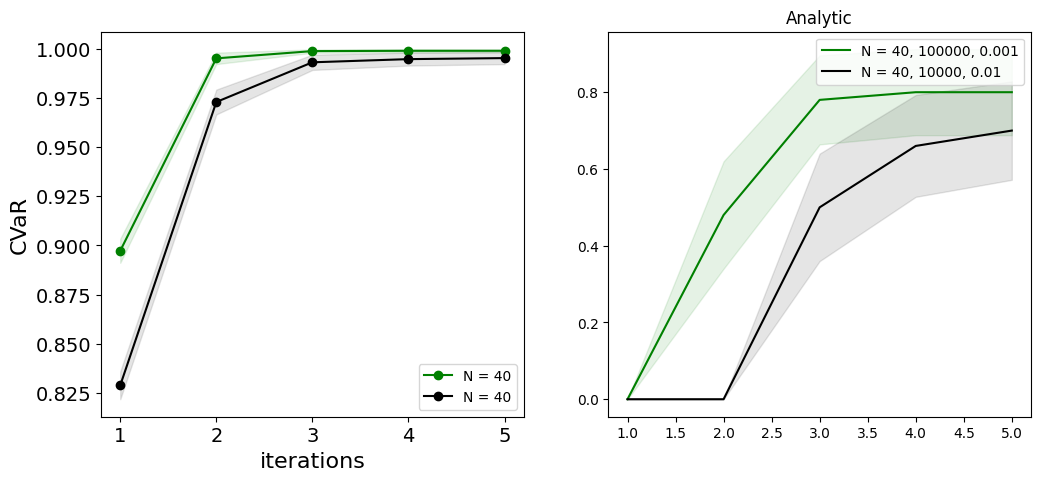

In [3]:
#fill dictionaries with data from files

f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

for if_adsorting in [True]:  #CHANGE LATER!!!!!!!
    
    for graph in graph_type_list:

        # dir_0 = './data_iter_adap_sorting_analytic_mps' + '/graph_{}/shots_{}'\
        #                         .format(graph,  shots)

        for n_qubits_i, num_variables in enumerate(num_variables_list):
            N = int(num_variables)
            
            if graph == 'complete':
                num_params = int(2*(N-1)*N/2 + N)
            elif graph == '3regular':
                num_params= int(2*(3*N)/2 + N)
            elif graph == '100':
                density = 1
                num_params = 2*round((N-1)*N*density/2) +N
            else:
                density = float(f"0.{int(graph)}")
                num_params = 2*round(density*(N-1)*N/2 + 1e-15) +N

            print("qubits = ", N, 'graph', graph)
                
            for alpha in alpha_list:
                
                if alpha == 0.001:
                    shots = 100000
                    c = str(10)
                    color = color_map.get("10", "black")
                    print('here', str(N), color)
                else:
                    shots = 10000
                    c = str(N)
                    color = color_map.get(c, "black")
                    print('here', str(N), color)
                
                print(alpha, shots)

                dir_0 = './data_iter_adap_sorting_analytic_mps' + '/graph_{}/shots_{}'\
                        .format(graph,  shots) 
                for taui, tau in enumerate(tau_list):
                    
                    #print("\ntau = ", tau, "alpha = ", alpha, "qubits = ", N, "parameters =", num_params)
                    
                    dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
                                        .format(num_variables, num_params, layer, alpha)
                    
                    successes = np.zeros((3, len(r_list)))
                    max_entros = []
                    # cvarvalues = []

                    cvar_passi = []
                    lows = []
                    ups = []

                    fid_passi = [] 
                    lows_fid = []
                    ups_fid = []

                    for passo in tot_steps: 
                        
                        successes = np.zeros((3, len(r_list)))
                        cvarvalues = []

                        max_fid = 0 
                        argmax = 0

                        for r in r_list:
                            
                            file_dir_name = dir_name + '/r_{}'\
                                        .format(r)
                            
                            filename = file_dir_name + '/ifadsorting_{}_tau_{}_bond_{}.pkl'\
                                                                    .format(if_adsorting,tau,bond)
                            with open(filename, 'rb') as f:
                                data = pickle.load(f)

                            params_list = data["params_list"]
                            if len(params_list) != round(num_params):
                                print("error N, r = ", r, len(params_list))
                                
                            steps_exp_poss_dict = data["steps_exp_poss_dict"]
                            steps_cvar_dict = data["steps_cvar_dict"]
                            # steps_entropy_dict = data["steps_entropy_dict"]
                            
                            # print(len(steps_exp_poss_dict['step_0'][:]))
                            # print(steps_exp_poss_dict['step_0'][0])
                            # print(steps_exp_poss_dict['step_0'][0][0][0] , 'here')
                            # print([item[0][0] for item in steps_exp_poss_dict['step_0']])
                            # print([item[0][1] for item in steps_exp_poss_dict['step_0']])
                            # print([item[1] for item in steps_exp_poss_dict['step_0']])
                            # print(steps_cvar_dict[f"step_{passo}"])

                            # final_exp_poss = steps_exp_poss_dict[f"step_{passo}"]["l_1"]
                            # poss_list = list(final_exp_poss.values())

                            poss_list = [item[1] for item in steps_exp_poss_dict[f'step_{passo}']]

                            if poss_list[0] > alpha:
                                successes[0][r] = 1
                            if sum(poss_list[:2]) > alpha:
                                successes[1][r] = 1
                            if sum(poss_list[:3]) > alpha:
                                successes[2][r] = 1

                            # print(r, poss_list[0], 'fidelities')
                            if poss_list[0] > max_fid:
                                max_fid = poss_list[0]
                                argmax = r 

                            # print('fidelity', poss_list[0])
                            # exp_opt = list(final_exp_poss.keys())[0]
                            exp_opt = steps_exp_poss_dict[f'step_{passo}'][0][0][0]
                            cvar = steps_cvar_dict[f"step_{passo}"]
                            cvarvalues.append(cvar/exp_opt)
                            # print('approx ratio', cvar/exp_opt)
                            # max_key = max(steps_entropy_dict, key=steps_entropy_dict.get)
                            # max_entros.append(steps_entropy_dict[max_key])
                        
                        print('max fid', max_fid, argmax)
                        mean_fid = np.mean(successes[0])
                        fid_passi.append(mean_fid)
                        

                        z = 1.96  # Z-score for 95% confidence

                                # Compute confidence intervals
                        margin_of_error = z * (np.std(successes[0], axis=0, ddof=1)/ np.sqrt(len(r_list)))
                        lower_bound = mean_fid - margin_of_error 
                        upper_bound = mean_fid + margin_of_error  

                        lows_fid.append(lower_bound)
                        ups_fid.append(upper_bound)



                        # for i in range(3):
                        #     fidelity_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][i][0] = np.mean(successes[i])
                        #     fidelity_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][i][1] = np.std(successes[i], axis=0, ddof=1)

                        # cvar_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][0] = np.mean(cvarvalues)
                        # cvar_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][1] = np.std(cvarvalues, axis=0, ddof=1)

                        mean = np.mean(cvarvalues)
                        cvar_passi.append(mean)
                        c = str(N)
                        # color = color_map.get(c, "black")
                        # print('here', str(N), color)
                        

                        z = 1.96  # Z-score for 95% confidence

                                # Compute confidence intervals
                        margin_of_error = z * (np.std(cvarvalues, axis=0, ddof=1)/ np.sqrt(len(r_list)))
                        lower_bound = mean - margin_of_error 
                        upper_bound = mean + margin_of_error  

                        lows.append(lower_bound)
                        ups.append(upper_bound)

                        # if if_adsorting:
                        #     ax1.plot(passo + 1, np.mean(cvarvalues), "o-", color = color, label = f'{num_variables}, {if_adsorting}, {shots}')
                        # else:
                        #     ax2.plot(passo + 1, np.mean(cvarvalues), "o-", color = color, label = f'{num_variables}, {if_adsorting}, {shots}')

                if if_adsorting:
                    xaxis = [pp +1 for pp in tot_steps]
                    ax1.plot(xaxis, cvar_passi, "o-", color = color, label = f'N = {int(num_variables)}')
                    ax1.fill_between(xaxis, lows, ups, color= color, alpha=0.1)
                    ax1.set_xticks(range(int(min(xaxis)), int(max(xaxis)) + 1))
                    ax1.set_ylabel('CVaR', fontsize=16)
                    ax1.set_xlabel('iterations', fontsize=16)
                                        # Adjust tick font size
                    ax1.tick_params(axis='x', labelsize=14)  # Set x-axis tick font size
                    ax1.tick_params(axis='y', labelsize=14)  # Set y-axis tick font size
                    ax1.legend()
                else:
                    xaxis = [pp +1 for pp in tot_steps]
                    ax1.plot(xaxis, cvar_passi, "o-", color = color, label = f'N = {int(num_variables)}')
                    ax1.fill_between(xaxis, lows, ups, color= color, alpha=0.1)
                    ax1.set_xticks(range(int(min(xaxis)), int(max(xaxis)) + 1))
                    ax1.set_ylabel('CVaR', fontsize=16)
                    ax1.set_xlabel('iterations',fontsize=16)
                    ax1.tick_params(axis='x', labelsize=14)  # Set x-axis tick font size
                    ax1.tick_params(axis='y', labelsize=14)  # Set y-axis tick font size
                    ax1.legend()

                ax2.plot(xaxis, fid_passi, color = color, label = f'N = {int(num_variables)}, {shots}, {alpha}')
                ax2.fill_between(xaxis, lows_fid, ups_fid, color= color, alpha=0.1)
                ax2.legend()
                ax2.set_title('Analytic')

                        # ax2.plot(passo +1 , np.mean(cvarvalues), "o:", label = f'{num_variables}, {if_adsorting}, {shots}')

                    # entropy_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][0] = np.mean(max_entros)
                    # entropy_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][1] = np.std(max_entros, axis=0, ddof=1)

qubits =  40 graph 3regular
here 40 green
0.001 100000
0 0 fidelities
1 0 fidelities
2 0 fidelities
3 0 fidelities
4 0 fidelities
5 0 fidelities
6 0 fidelities
7 0 fidelities
8 0 fidelities
9 0 fidelities
10 0 fidelities
11 0 fidelities
12 0 fidelities
13 0 fidelities
14 0 fidelities
15 0 fidelities
16 0 fidelities
17 0 fidelities
18 0 fidelities
19 0 fidelities
20 0 fidelities
21 0 fidelities
22 0 fidelities
23 0 fidelities
24 0 fidelities
25 0 fidelities
26 0 fidelities
27 0 fidelities
28 0 fidelities
29 0 fidelities
30 0 fidelities
31 0 fidelities
32 0 fidelities
33 0 fidelities
34 0 fidelities
35 0 fidelities
36 0 fidelities
37 0 fidelities
38 0 fidelities
39 0 fidelities
40 0 fidelities
41 0 fidelities
42 0 fidelities
43 0 fidelities
44 0 fidelities
45 0 fidelities
46 0 fidelities
47 0 fidelities
48 1e-05 fidelities
49 0 fidelities
max fid 1e-05 48
0 4e-05 fidelities
1 0.02137 fidelities
2 9e-05 fidelities
3 0.00052 fidelities
4 0.00123 fidelities
5 0.03161 fidelities
6 0.00233 fi

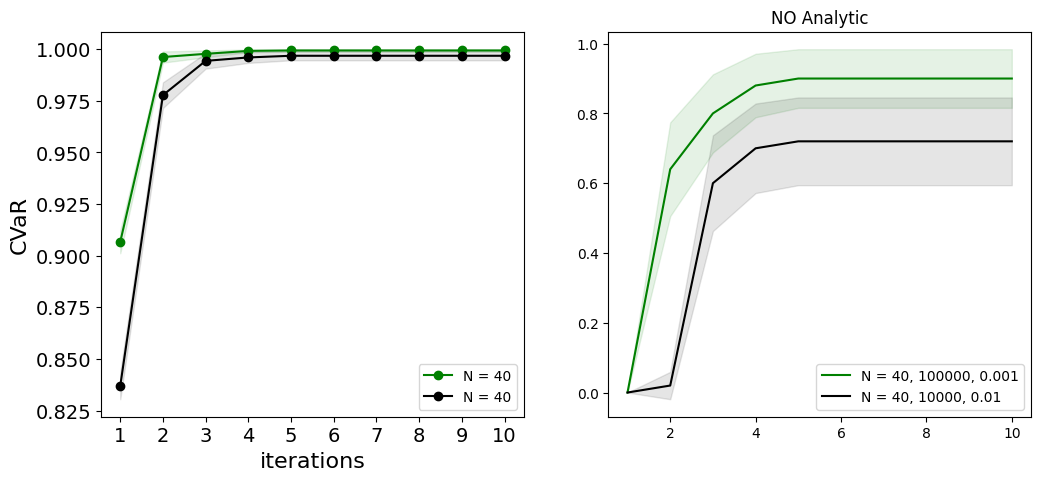

In [4]:
#fill dictionaries with data from files

f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

tot_steps = range(10)
for if_adsorting in [True]:  #CHANGE LATER!!!!!!!
    
    for graph in graph_type_list:

        # dir_0 = './data_iter_adap_sorting_analytic_mps' + '/graph_{}/shots_{}'\
        #                         .format(graph,  shots)

        for n_qubits_i, num_variables in enumerate(num_variables_list):
            N = int(num_variables)
            
            if graph == 'complete':
                num_params = int(2*(N-1)*N/2 + N)
            elif graph == '3regular':
                num_params= int(2*(3*N)/2 + N)
            elif graph == '100':
                density = 1
                num_params = 2*round((N-1)*N*density/2) +N
            else:
                density = float(f"0.{int(graph)}")
                num_params = 2*round(density*(N-1)*N/2 + 1e-15) +N

            print("qubits = ", N, 'graph', graph)
                
            for alpha in alpha_list:
                
                if alpha == 0.001:
                    shots = 100000
                    c = str(10)
                    color = color_map.get("10", "black")
                    print('here', str(N), color)
                else:
                    shots = 10000
                    c = str(N)
                    color = color_map.get(c, "black")
                    print('here', str(N), color)
                
                print(alpha, shots)

                dir_0 = './data_iter_adap_sorting_nomeasure_mps' + '/graph_{}/shots_{}'\
                        .format(graph,  shots) 
                for taui, tau in enumerate(tau_list):
                    
                    #print("\ntau = ", tau, "alpha = ", alpha, "qubits = ", N, "parameters =", num_params)
                    
                    dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
                                        .format(num_variables, num_params, layer, alpha)
                    
                    successes = np.zeros((3, len(r_list)))
                    max_entros = []
                    # cvarvalues = []

                    cvar_passi = []
                    lows = []
                    ups = []

                    fid_passi = [] 
                    lows_fid = []
                    ups_fid = []

                    for passo in tot_steps: 
                        
                        successes = np.zeros((3, len(r_list)))
                        cvarvalues = []

                        max_fid = 0 
                        argmax = 0 

                        for r in r_list:
                            
                            file_dir_name = dir_name + '/r_{}'\
                                        .format(r)
                            
                            filename = file_dir_name + '/ifadsorting_{}_tau_{}_bond_{}.pkl'\
                                                                    .format(if_adsorting,tau,bond)
                            with open(filename, 'rb') as f:
                                data = pickle.load(f)

                            params_list = data["params_list"]
                            if len(params_list) != round(num_params):
                                print("error N, r = ", r, len(params_list))
                                
                            steps_exp_poss_dict = data["steps_exp_poss_dict"]
                            steps_cvar_dict = data["steps_cvar_dict"]
                            # steps_entropy_dict = data["steps_entropy_dict"]
                            
                            # print(len(steps_exp_poss_dict['step_0'][:]))
                            # print(steps_exp_poss_dict['step_0'][0])
                            # print(steps_exp_poss_dict['step_0'][0][0][0] , 'here')
                            # print([item[0][0] for item in steps_exp_poss_dict['step_0']])
                            # print([item[0][1] for item in steps_exp_poss_dict['step_0']])
                            # print([item[1] for item in steps_exp_poss_dict['step_0']])
                            # print(steps_cvar_dict[f"step_{passo}"])

                            # final_exp_poss = steps_exp_poss_dict[f"step_{passo}"]["l_1"]
                            # poss_list = list(final_exp_poss.values())

                            poss_list = [item[1] for item in steps_exp_poss_dict[f'step_{passo}']]

                            if poss_list[0] > alpha:
                                successes[0][r] = 1
                            if sum(poss_list[:2]) > alpha:
                                successes[1][r] = 1
                            if sum(poss_list[:3]) > alpha:
                                successes[2][r] = 1
                            
                            print(r, poss_list[0], 'fidelities')
                            if poss_list[0] > max_fid:
                                max_fid = poss_list[0]
                                argmax = r 

                            # print('fidelity', poss_list[0])
                            # exp_opt = list(final_exp_poss.keys())[0]
                            exp_opt = steps_exp_poss_dict[f'step_{passo}'][0][0][0]
                            cvar = steps_cvar_dict[f"step_{passo}"]
                            cvarvalues.append(cvar/exp_opt)
                            # print('approx ratio', cvar/exp_opt)
                            # max_key = max(steps_entropy_dict, key=steps_entropy_dict.get)
                            # max_entros.append(steps_entropy_dict[max_key])
                        
                        print('max fid', max_fid, argmax)
                        mean_fid = np.mean(successes[0])
                        fid_passi.append(mean_fid)
                        

                        z = 1.96  # Z-score for 95% confidence

                                # Compute confidence intervals
                        margin_of_error = z * (np.std(successes[0], axis=0, ddof=1)/ np.sqrt(len(r_list)))
                        lower_bound = mean_fid - margin_of_error 
                        upper_bound = mean_fid + margin_of_error  

                        lows_fid.append(lower_bound)
                        ups_fid.append(upper_bound)



                        # for i in range(3):
                        #     fidelity_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][i][0] = np.mean(successes[i])
                        #     fidelity_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][i][1] = np.std(successes[i], axis=0, ddof=1)

                        # cvar_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][0] = np.mean(cvarvalues)
                        # cvar_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][1] = np.std(cvarvalues, axis=0, ddof=1)

                        mean = np.mean(cvarvalues)
                        cvar_passi.append(mean)
                        c = str(N)
                        # color = color_map.get(c, "black")
                        # print('here', str(N), color)
                        

                        z = 1.96  # Z-score for 95% confidence

                                # Compute confidence intervals
                        margin_of_error = z * (np.std(cvarvalues, axis=0, ddof=1)/ np.sqrt(len(r_list)))
                        lower_bound = mean - margin_of_error 
                        upper_bound = mean + margin_of_error  

                        lows.append(lower_bound)
                        ups.append(upper_bound)

                        # if if_adsorting:
                        #     ax1.plot(passo + 1, np.mean(cvarvalues), "o-", color = color, label = f'{num_variables}, {if_adsorting}, {shots}')
                        # else:
                        #     ax2.plot(passo + 1, np.mean(cvarvalues), "o-", color = color, label = f'{num_variables}, {if_adsorting}, {shots}')

                if if_adsorting:
                    xaxis = [pp +1 for pp in tot_steps]
                    ax1.plot(xaxis, cvar_passi, "o-", color = color, label = f'N = {int(num_variables)}')
                    ax1.fill_between(xaxis, lows, ups, color= color, alpha=0.1)
                    ax1.set_xticks(range(int(min(xaxis)), int(max(xaxis)) + 1))
                    ax1.set_ylabel('CVaR', fontsize=16)
                    ax1.set_xlabel('iterations', fontsize=16)
                                        # Adjust tick font size
                    ax1.tick_params(axis='x', labelsize=14)  # Set x-axis tick font size
                    ax1.tick_params(axis='y', labelsize=14)  # Set y-axis tick font size
                    ax1.legend()
                else:
                    xaxis = [pp +1 for pp in tot_steps]
                    ax1.plot(xaxis, cvar_passi, "o-", color = color, label = f'N = {int(num_variables)}')
                    ax1.fill_between(xaxis, lows, ups, color= color, alpha=0.1)
                    ax1.set_xticks(range(int(min(xaxis)), int(max(xaxis)) + 1))
                    ax1.set_ylabel('CVaR', fontsize=16)
                    ax1.set_xlabel('iterations',fontsize=16)
                    ax1.tick_params(axis='x', labelsize=14)  # Set x-axis tick font size
                    ax1.tick_params(axis='y', labelsize=14)  # Set y-axis tick font size
                    ax1.legend()

                ax2.plot(xaxis, fid_passi, color = color, label = f'N = {int(num_variables)}, {shots}, {alpha}')
                ax2.fill_between(xaxis, lows_fid, ups_fid, color= color, alpha=0.1)
                ax2.legend()
                ax2.set_title('NO Analytic')

                        # ax2.plot(passo +1 , np.mean(cvarvalues), "o:", label = f'{num_variables}, {if_adsorting}, {shots}')

                    # entropy_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][0] = np.mean(max_entros)
                    # entropy_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][1] = np.std(max_entros, axis=0, ddof=1)

qubits =  40 graph 3regular
here 40 green
0.001 100000
0 0 fidelities
1 0 fidelities
2 0 fidelities
3 0 fidelities
4 0 fidelities
5 0 fidelities
6 0 fidelities
7 0 fidelities
8 0 fidelities
9 0 fidelities
10 0 fidelities
11 0 fidelities
12 0 fidelities
13 0 fidelities
14 0 fidelities
15 0 fidelities
16 0 fidelities
17 0 fidelities
18 0 fidelities
19 0 fidelities
20 0 fidelities
21 0 fidelities
22 0 fidelities
23 0 fidelities
24 0 fidelities
25 0 fidelities
26 0 fidelities
27 0 fidelities
28 0 fidelities
29 0 fidelities
30 0 fidelities
31 0 fidelities
32 0 fidelities
33 0 fidelities
34 0 fidelities
35 0 fidelities
36 0 fidelities
37 0 fidelities
38 0 fidelities
39 0 fidelities
40 0 fidelities
41 0 fidelities
42 0 fidelities
43 0 fidelities
44 0 fidelities
45 0 fidelities
46 0 fidelities
47 0 fidelities
48 1e-05 fidelities
49 0 fidelities
max fid 1e-05 48
0 4e-05 fidelities
1 0.02137 fidelities
2 9e-05 fidelities
3 0.00052 fidelities
4 0.00123 fidelities
5 0.03161 fidelities
6 0.00233 fi

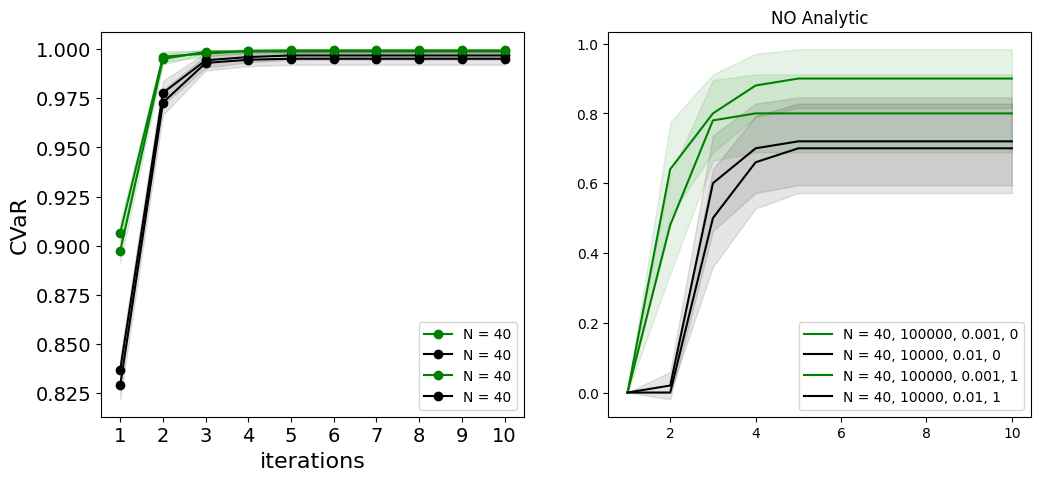

In [5]:
#fill dictionaries with data from files

f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

tot_steps = range(10)

for if_analitic in [0,1]:
    for if_adsorting in [True]:  #CHANGE LATER!!!!!!!
        
        for graph in graph_type_list:

            # dir_0 = './data_iter_adap_sorting_analytic_mps' + '/graph_{}/shots_{}'\
            #                         .format(graph,  shots)

            for n_qubits_i, num_variables in enumerate(num_variables_list):
                N = int(num_variables)
                
                if graph == 'complete':
                    num_params = int(2*(N-1)*N/2 + N)
                elif graph == '3regular':
                    num_params= int(2*(3*N)/2 + N)
                elif graph == '100':
                    density = 1
                    num_params = 2*round((N-1)*N*density/2) +N
                else:
                    density = float(f"0.{int(graph)}")
                    num_params = 2*round(density*(N-1)*N/2 + 1e-15) +N

                print("qubits = ", N, 'graph', graph)
                    
                for alpha in alpha_list:
                    
                    if alpha == 0.001:
                        shots = 100000
                        c = str(10)
                        color = color_map.get("10", "black")
                        print('here', str(N), color)
                    else:
                        shots = 10000
                        c = str(N)
                        color = color_map.get(c, "black")
                        print('here', str(N), color)
                    
                    print(alpha, shots)

                    if if_analitic == 0 :
                        dir_0 = './data_iter_adap_sorting_nomeasure_mps' + '/graph_{}/shots_{}'\
                                .format(graph,  shots) 
                    else:
                        dir_0 = './data_iter_adap_sorting_analytic_mps' + '/graph_{}/shots_{}'\
                                .format(graph,  shots) 
                    for taui, tau in enumerate(tau_list):
                        
                        #print("\ntau = ", tau, "alpha = ", alpha, "qubits = ", N, "parameters =", num_params)
                        
                        dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
                                            .format(num_variables, num_params, layer, alpha)
                        
                        successes = np.zeros((3, len(r_list)))
                        max_entros = []
                        # cvarvalues = []

                        cvar_passi = []
                        lows = []
                        ups = []

                        fid_passi = [] 
                        lows_fid = []
                        ups_fid = []

                        for passo in tot_steps: 
                            
                            successes = np.zeros((3, len(r_list)))
                            cvarvalues = []

                            max_fid = 0 
                            argmax = 0 

                            for r in r_list:
                                
                                file_dir_name = dir_name + '/r_{}'\
                                            .format(r)
                                
                                filename = file_dir_name + '/ifadsorting_{}_tau_{}_bond_{}.pkl'\
                                                                        .format(if_adsorting,tau,bond)
                                with open(filename, 'rb') as f:
                                    data = pickle.load(f)

                                params_list = data["params_list"]
                                if len(params_list) != round(num_params):
                                    print("error N, r = ", r, len(params_list))
                                    
                                steps_exp_poss_dict = data["steps_exp_poss_dict"]
                                steps_cvar_dict = data["steps_cvar_dict"]
                                # steps_entropy_dict = data["steps_entropy_dict"]
                                
                                # print(len(steps_exp_poss_dict['step_0'][:]))
                                # print(steps_exp_poss_dict['step_0'][0])
                                # print(steps_exp_poss_dict['step_0'][0][0][0] , 'here')
                                # print([item[0][0] for item in steps_exp_poss_dict['step_0']])
                                # print([item[0][1] for item in steps_exp_poss_dict['step_0']])
                                # print([item[1] for item in steps_exp_poss_dict['step_0']])
                                # print(steps_cvar_dict[f"step_{passo}"])

                                # final_exp_poss = steps_exp_poss_dict[f"step_{passo}"]["l_1"]
                                # poss_list = list(final_exp_poss.values())

                                poss_list = [item[1] for item in steps_exp_poss_dict[f'step_{passo}']]

                                if poss_list[0] > alpha:
                                    successes[0][r] = 1
                                if sum(poss_list[:2]) > alpha:
                                    successes[1][r] = 1
                                if sum(poss_list[:3]) > alpha:
                                    successes[2][r] = 1
                                
                                print(r, poss_list[0], 'fidelities')
                                if poss_list[0] > max_fid:
                                    max_fid = poss_list[0]
                                    argmax = r 

                                # print('fidelity', poss_list[0])
                                # exp_opt = list(final_exp_poss.keys())[0]
                                exp_opt = steps_exp_poss_dict[f'step_{passo}'][0][0][0]
                                cvar = steps_cvar_dict[f"step_{passo}"]
                                cvarvalues.append(cvar/exp_opt)
                                # print('approx ratio', cvar/exp_opt)
                                # max_key = max(steps_entropy_dict, key=steps_entropy_dict.get)
                                # max_entros.append(steps_entropy_dict[max_key])
                            
                            print('max fid', max_fid, argmax)
                            mean_fid = np.mean(successes[0])
                            fid_passi.append(mean_fid)
                            

                            z = 1.96  # Z-score for 95% confidence

                                    # Compute confidence intervals
                            margin_of_error = z * (np.std(successes[0], axis=0, ddof=1)/ np.sqrt(len(r_list)))
                            lower_bound = mean_fid - margin_of_error 
                            upper_bound = mean_fid + margin_of_error  

                            lows_fid.append(lower_bound)
                            ups_fid.append(upper_bound)



                            # for i in range(3):
                            #     fidelity_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][i][0] = np.mean(successes[i])
                            #     fidelity_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][i][1] = np.std(successes[i], axis=0, ddof=1)

                            # cvar_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][0] = np.mean(cvarvalues)
                            # cvar_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][1] = np.std(cvarvalues, axis=0, ddof=1)

                            mean = np.mean(cvarvalues)
                            cvar_passi.append(mean)
                            c = str(N)
                            # color = color_map.get(c, "black")
                            # print('here', str(N), color)
                            

                            z = 1.96  # Z-score for 95% confidence

                                    # Compute confidence intervals
                            margin_of_error = z * (np.std(cvarvalues, axis=0, ddof=1)/ np.sqrt(len(r_list)))
                            lower_bound = mean - margin_of_error 
                            upper_bound = mean + margin_of_error  

                            lows.append(lower_bound)
                            ups.append(upper_bound)

                            # if if_adsorting:
                            #     ax1.plot(passo + 1, np.mean(cvarvalues), "o-", color = color, label = f'{num_variables}, {if_adsorting}, {shots}')
                            # else:
                            #     ax2.plot(passo + 1, np.mean(cvarvalues), "o-", color = color, label = f'{num_variables}, {if_adsorting}, {shots}')

                    if if_adsorting:
                        xaxis = [pp +1 for pp in tot_steps]
                        ax1.plot(xaxis, cvar_passi, "o-", color = color, label = f'N = {int(num_variables)}')
                        ax1.fill_between(xaxis, lows, ups, color= color, alpha=0.1)
                        ax1.set_xticks(range(int(min(xaxis)), int(max(xaxis)) + 1))
                        ax1.set_ylabel('CVaR', fontsize=16)
                        ax1.set_xlabel('iterations', fontsize=16)
                                            # Adjust tick font size
                        ax1.tick_params(axis='x', labelsize=14)  # Set x-axis tick font size
                        ax1.tick_params(axis='y', labelsize=14)  # Set y-axis tick font size
                        ax1.legend()
                    else:
                        xaxis = [pp +1 for pp in tot_steps]
                        ax1.plot(xaxis, cvar_passi, "o-", color = color, label = f'N = {int(num_variables)}')
                        ax1.fill_between(xaxis, lows, ups, color= color, alpha=0.1)
                        ax1.set_xticks(range(int(min(xaxis)), int(max(xaxis)) + 1))
                        ax1.set_ylabel('CVaR', fontsize=16)
                        ax1.set_xlabel('iterations',fontsize=16)
                        ax1.tick_params(axis='x', labelsize=14)  # Set x-axis tick font size
                        ax1.tick_params(axis='y', labelsize=14)  # Set y-axis tick font size
                        ax1.legend()

                    ax2.plot(xaxis, fid_passi, color = color, label = f'N = {int(num_variables)}, {shots}, {alpha}, {if_analitic}')
                    ax2.fill_between(xaxis, lows_fid, ups_fid, color= color, alpha=0.1)
                    ax2.legend()
                    ax2.set_title('NO Analytic')

                            # ax2.plot(passo +1 , np.mean(cvarvalues), "o:", label = f'{num_variables}, {if_adsorting}, {shots}')

                        # entropy_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][0] = np.mean(max_entros)
                        # entropy_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][1] = np.std(max_entros, axis=0, ddof=1)

qubits =  40 graph 3regular
here 40 green
0.001 100000
[0.99994]
max fid 0.99994 10
[0.99994, 0.99976]
max fid 0.99994 10
[0.99994, 0.99976, 0.99836]
max fid 0.99994 10
[0.99994, 0.99976, 0.99836, 0.99758]
max fid 0.99994 10
[0.99994, 0.99976, 0.99836, 0.99758, 0.99613]
max fid 0.99994 10
here 40 black
0.01 10000
[1.0]
max fid 1.0 10
[1.0, 0.9998]
max fid 1.0 10
[1.0, 0.9998, 0.9987]
max fid 1.0 10
[1.0, 0.9998, 0.9987, 0.9968]
max fid 1.0 10
[1.0, 0.9998, 0.9987, 0.9968, 0.9957]
max fid 1.0 10


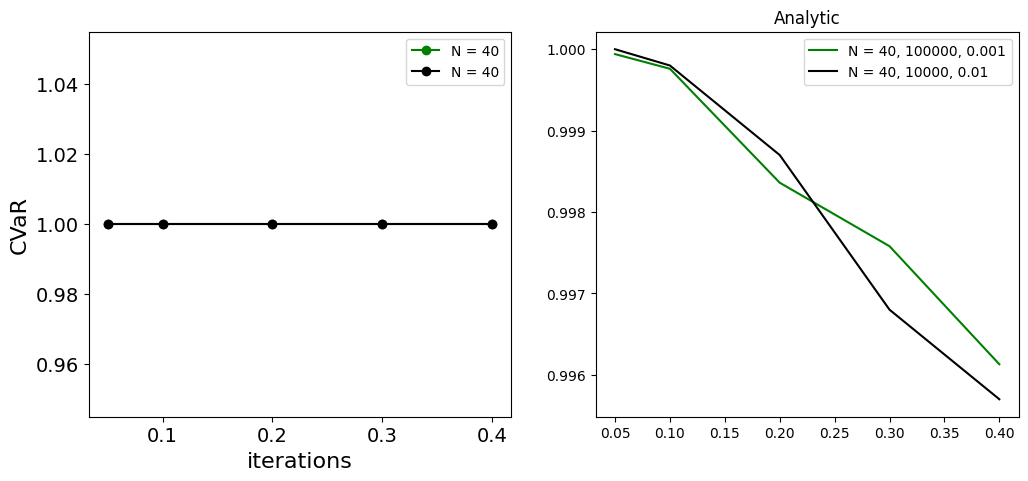

In [6]:
#fill dictionaries with data from files

f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

for if_adsorting in [True]:  #CHANGE LATER!!!!!!!
    
    for graph in graph_type_list:

        # dir_0 = './data_iter_adap_sorting_analytic_mps' + '/graph_{}/shots_{}'\
        #                         .format(graph,  shots)

        for n_qubits_i, num_variables in enumerate(num_variables_list):
            N = int(num_variables)
            
            if graph == 'complete':
                num_params = int(2*(N-1)*N/2 + N)
            elif graph == '3regular':
                num_params= int(2*(3*N)/2 + N)
            elif graph == '100':
                density = 1
                num_params = 2*round((N-1)*N*density/2) +N
            else:
                density = float(f"0.{int(graph)}")
                num_params = 2*round(density*(N-1)*N/2 + 1e-15) +N

            print("qubits = ", N, 'graph', graph)
                
            for alpha in alpha_list:
                
                if alpha == 0.001:
                    shots = 100000
                    c = str(10)
                    color = color_map.get("10", "black")
                    print('here', str(N), color)
                else:
                    shots = 10000
                    c = str(N)
                    color = color_map.get(c, "black")
                    print('here', str(N), color)
                
                print(alpha, shots)

                dir_0 = './data_iter_adap_sorting_analytic_mps' + '/graph_{}/shots_{}'\
                        .format(graph,  shots) 
                for taui, tau in enumerate(tau_list):
                    
                    #print("\ntau = ", tau, "alpha = ", alpha, "qubits = ", N, "parameters =", num_params)
                    
                    dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
                                        .format(num_variables, num_params, layer, alpha)
                    
                    cvars = [] 
                    fidelities = [] 

                    for passo in [0.05, 0.1, 0.2, 0.3, 0.4]: 


                        for r in np.arange(10,11):
                            
                            file_dir_name = dir_name + '/r_{}'\
                                        .format(r)
                            
                            filename = file_dir_name + '/ifadsorting_{}_tau_{}_bond_{}.pkl'\
                                                                    .format(if_adsorting,passo,bond)
                            with open(filename, 'rb') as f:
                                data = pickle.load(f)

                            params_list = data["params_list"]
                            if len(params_list) != round(num_params):
                                print("error N, r = ", r, len(params_list))
                                
                            steps_exp_poss_dict = data["steps_exp_poss_dict"]
                            steps_cvar_dict = data["steps_cvar_dict"]
                            # steps_entropy_dict = data["steps_entropy_dict"]
                            
                            # print(len(steps_exp_poss_dict['step_0'][:]))
                            # print(steps_exp_poss_dict['step_0'][0])
                            # print(steps_exp_poss_dict['step_0'][0][0][0] , 'here')
                            # print([item[0][0] for item in steps_exp_poss_dict['step_0']])
                            # print([item[0][1] for item in steps_exp_poss_dict['step_0']])
                            # print([item[1] for item in steps_exp_poss_dict['step_0']])
                            # print(steps_cvar_dict[f"step_{passo}"])

                            # final_exp_poss = steps_exp_poss_dict[f"step_{passo}"]["l_1"]
                            # poss_list = list(final_exp_poss.values())

                            poss_list = [item[1] for item in steps_exp_poss_dict[f'step_{len(tot_steps)-1}']]

                            if poss_list[0] > alpha:
                                successes[0][r] = 1
                            if sum(poss_list[:2]) > alpha:
                                successes[1][r] = 1
                            if sum(poss_list[:3]) > alpha:
                                successes[2][r] = 1

                            # print(r, poss_list[0], 'fidelities')
                            if poss_list[0] > max_fid:
                                max_fid = poss_list[0]
                                argmax = r 

                            fidelities.append(poss_list[0])
                            print(fidelities)
                            # exp_opt = list(final_exp_poss.keys())[0]
                            exp_opt = steps_exp_poss_dict[f'step_{len(tot_steps)-1}'][0][0][0]
                            cvar = steps_cvar_dict[f"step_{len(tot_steps)-1}"]
                            cvarvalues.append(cvar/exp_opt)

                            cvars.append(cvar/exp_opt)
                            # print('approx ratio', cvar/exp_opt)
                            # max_key = max(steps_entropy_dict, key=steps_entropy_dict.get)
                            # max_entros.append(steps_entropy_dict[max_key])
                        
                        print('max fid', max_fid, argmax)
                        mean_fid = np.mean(successes[0])
                        fid_passi.append(poss_list[0])
                        

                        z = 1.96  # Z-score for 95% confidence

                                # Compute confidence intervals
                        margin_of_error = z * (np.std(successes[0], axis=0, ddof=1)/ np.sqrt(len(r_list)))
                        lower_bound = mean_fid - margin_of_error 
                        upper_bound = mean_fid + margin_of_error  

                        lows_fid.append(lower_bound)
                        ups_fid.append(upper_bound)



                        # for i in range(3):
                        #     fidelity_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][i][0] = np.mean(successes[i])
                        #     fidelity_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][i][1] = np.std(successes[i], axis=0, ddof=1)

                        # cvar_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][0] = np.mean(cvarvalues)
                        # cvar_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][1] = np.std(cvarvalues, axis=0, ddof=1)

                        mean = np.mean(cvarvalues)
                        cvar_passi.append(cvarvalues)
                        c = str(N)
                        # color = color_map.get(c, "black")
                        # print('here', str(N), color)
                        

                        z = 1.96  # Z-score for 95% confidence

                                # Compute confidence intervals
                        margin_of_error = z * (np.std(cvarvalues, axis=0, ddof=1)/ np.sqrt(len(r_list)))
                        lower_bound = mean - margin_of_error 
                        upper_bound = mean + margin_of_error  

                        lows.append(lower_bound)
                        ups.append(upper_bound)

                        # if if_adsorting:
                        #     ax1.plot(passo + 1, np.mean(cvarvalues), "o-", color = color, label = f'{num_variables}, {if_adsorting}, {shots}')
                        # else:
                        #     ax2.plot(passo + 1, np.mean(cvarvalues), "o-", color = color, label = f'{num_variables}, {if_adsorting}, {shots}')

                    if if_adsorting:
                        xaxis = [pp +1 for pp in tot_steps]
                        xaxis = [0.05, 0.1, 0.2, 0.3, 0.4]
                        ax1.plot(xaxis, cvars, "o-", color = color, label = f'N = {int(num_variables)}')
                        # ax1.fill_between(xaxis, lows, ups, color= color, alpha=0.1)
                        # ax1.set_xticks(range(int(min(xaxis)), int(max(xaxis)) + 1))
                        ax1.set_ylabel('CVaR', fontsize=16)
                        ax1.set_xlabel('iterations', fontsize=16)
                                            # Adjust tick font size
                        ax1.tick_params(axis='x', labelsize=14)  # Set x-axis tick font size
                        ax1.tick_params(axis='y', labelsize=14)  # Set y-axis tick font size
                        ax1.legend()
                    else:
                        xaxis = [pp +1 for pp in tot_steps]
                        xaxis = [0.05, 0.1, 0.2, 0.3, 0.4]
                        ax1.plot(xaxis, cvars, "o-", color = color, label = f'N = {int(num_variables)}')
                        # ax1.fill_between(xaxis, lows, ups, color= color, alpha=0.1)
                        # ax1.set_xticks(range(int(min(xaxis)), int(max(xaxis)) + 1))
                        ax1.set_ylabel('CVaR', fontsize=16)
                        ax1.set_xlabel('iterations',fontsize=16)
                        ax1.tick_params(axis='x', labelsize=14)  # Set x-axis tick font size
                        ax1.tick_params(axis='y', labelsize=14)  # Set y-axis tick font size
                        ax1.legend()

                    ax2.plot(xaxis, fidelities, color = color, label = f'N = {int(num_variables)}, {shots}, {alpha}')
                    # ax2.fill_between(xaxis, lows_fid, ups_fid, color= color, alpha=0.1)
                    ax2.legend()
                    ax2.set_title('Analytic')

                        # ax2.plot(passo +1 , np.mean(cvarvalues), "o:", label = f'{num_variables}, {if_adsorting}, {shots}')

                    # entropy_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][0] = np.mean(max_entros)
                    # entropy_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][1] = np.std(max_entros, axis=0, ddof=1)

In [7]:
print(fidelities)

[1.0, 0.9998, 0.9987, 0.9968, 0.9957]


qubits =  40 graph 3regular
0.01 10000

 Fidelities [0, 0, 0, 0.0003, 0.0064, 0.6751, 0.9999, 0.9999, 1.0, 1.0] 0.05

 cvar [0.5028970541170736, 0.719215508176235, 0.8946778426322449, 0.9638363838639377, 0.9873664446713505, 1.0, 1.0, 1.0, 1.0, 1.0] 0.05

 Fidelities [0, 0, 0.0008, 0.0677, 0.9997, 0.9998, 0.9997, 0.9995, 0.9997, 0.9998] 0.1

 cvar [0.5791506469360076, 0.8062698995687098, 0.9658758553423653, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 0.1

 Fidelities [0, 0.0002, 0.024, 0.9995, 0.9981, 0.999, 0.9994, 0.9993, 0.999, 0.9987] 0.2

 cvar [0.684711827727571, 0.9257783806025884, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 0.2

 Fidelities [0, 0.0008, 0.0857, 0.9985, 0.9961, 0.9973, 0.9983, 0.9981, 0.9978, 0.9968] 0.3

 cvar [0.7825684807290799, 0.9683679534267036, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 0.3

 Fidelities [0, 0.0033, 0.6081, 0.9958, 0.9946, 0.9968, 0.9953, 0.9944, 0.995, 0.9957] 0.4

 cvar [0.8385239191063301, 0.9817661276803269, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 0.4


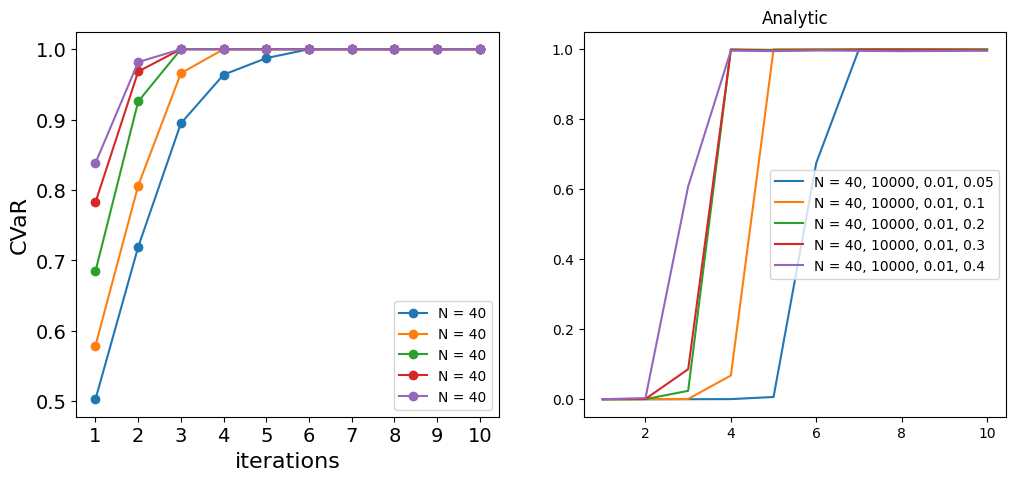

In [8]:
#fill dictionaries with data from files

f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

for if_adsorting in [True]:  #CHANGE LATER!!!!!!!
    
    for graph in graph_type_list:

        # dir_0 = './data_iter_adap_sorting_analytic_mps' + '/graph_{}/shots_{}'\
        #                         .format(graph,  shots)

        for n_qubits_i, num_variables in enumerate(num_variables_list):
            N = int(num_variables)
            
            if graph == 'complete':
                num_params = int(2*(N-1)*N/2 + N)
            elif graph == '3regular':
                num_params= int(2*(3*N)/2 + N)
            elif graph == '100':
                density = 1
                num_params = 2*round((N-1)*N*density/2) +N
            else:
                density = float(f"0.{int(graph)}")
                num_params = 2*round(density*(N-1)*N/2 + 1e-15) +N

            print("qubits = ", N, 'graph', graph)
                
            for alpha in [0.01]:
                
                # if alpha == 0.001:
                #     shots = 100000
                #     c = str(10)
                #     color = color_map.get("10", "black")
                #     print('here', str(N), color)
                # else:
                #     shots = 10000
                #     c = str(N)
                #     color = color_map.get(c, "black")
                #     print('here', str(N), color)
                
                print(alpha, shots)

                dir_0 = './data_iter_adap_sorting_analytic_mps' + '/graph_{}/shots_{}'\
                        .format(graph,  shots) 
                
                for taui, tau in enumerate([0.05, 0.1,0.2,0.3,0.4]):
                    
                    #print("\ntau = ", tau, "alpha = ", alpha, "qubits = ", N, "parameters =", num_params)
                    
                    dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
                                        .format(num_variables, num_params, layer, alpha)
                    
                    fid_passi = [] 
                    cvar_passi = []

                    for passo in tot_steps: 
        
                        for r in np.arange(10,11):
                            
                            file_dir_name = dir_name + '/r_{}'\
                                        .format(r)
                            
                            filename = file_dir_name + '/ifadsorting_{}_tau_{}_bond_{}.pkl'\
                                                                    .format(if_adsorting,tau,bond)
                            with open(filename, 'rb') as f:
                                data = pickle.load(f)

                            params_list = data["params_list"]
                            if len(params_list) != round(num_params):
                                print("error N, r = ", r, len(params_list))
                                
                            steps_exp_poss_dict = data["steps_exp_poss_dict"]
                            steps_cvar_dict = data["steps_cvar_dict"]
                            # steps_entropy_dict = data["steps_entropy_dict"]
                            
                            # print(len(steps_exp_poss_dict['step_0'][:]))
                            # print(steps_exp_poss_dict['step_0'][0])
                            # print(steps_exp_poss_dict['step_0'][0][0][0] , 'here')
                            # print([item[0][0] for item in steps_exp_poss_dict['step_0']])
                            # print([item[0][1] for item in steps_exp_poss_dict['step_0']])
                            # print([item[1] for item in steps_exp_poss_dict['step_0']])
                            # print(steps_cvar_dict[f"step_{passo}"])

                            # final_exp_poss = steps_exp_poss_dict[f"step_{passo}"]["l_1"]
                            # poss_list = list(final_exp_poss.values())

                            poss_list = [item[1] for item in steps_exp_poss_dict[f'step_{passo}']]

                            # if poss_list[0] > alpha:
                            #     successes[0][r] = 1
                            # if sum(poss_list[:2]) > alpha:
                            #     successes[1][r] = 1
                            # if sum(poss_list[:3]) > alpha:
                            #     successes[2][r] = 1
                            fidelity = poss_list[0]


                            # print('fidelity', poss_list[0])
                            # exp_opt = list(final_exp_poss.keys())[0]
                            exp_opt = steps_exp_poss_dict[f'step_{passo}'][0][0][0]
                            cvar = steps_cvar_dict[f"step_{passo}"]
                            ar = cvar/exp_opt
                            # print('approx ratio', cvar/exp_opt)
                            # max_key = max(steps_entropy_dict, key=steps_entropy_dict.get)
                            # max_entros.append(steps_entropy_dict[max_key])
                        
                        # print('max fid', max_fid, argmax)
                        # mean_fid = np.mean(successes[0])
                        fid_passi.append(fidelity)
                        
                        cvar_passi.append(ar)

                        # z = 1.96  # Z-score for 95% confidence

                        #         # Compute confidence intervals
                        # margin_of_error = z * (np.std(successes[0], axis=0, ddof=1)/ np.sqrt(len(r_list)))
                        # lower_bound = mean_fid - margin_of_error 
                        # upper_bound = mean_fid + margin_of_error  

                        # lows_fid.append(lower_bound)
                        # ups_fid.append(upper_bound)



                        # for i in range(3):
                        #     fidelity_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][i][0] = np.mean(successes[i])
                        #     fidelity_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][i][1] = np.std(successes[i], axis=0, ddof=1)

                        # cvar_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][0] = np.mean(cvarvalues)
                        # cvar_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][1] = np.std(cvarvalues, axis=0, ddof=1)

                        # mean = np.mean(cvarvalues)
                        # cvar_passi.append(mean)
                        # c = str(N)
                        # # color = color_map.get(c, "black")
                        # # print('here', str(N), color)
                        

                        # z = 1.96  # Z-score for 95% confidence

                        #         # Compute confidence intervals
                        # margin_of_error = z * (np.std(cvarvalues, axis=0, ddof=1)/ np.sqrt(len(r_list)))
                        # lower_bound = mean - margin_of_error 
                        # upper_bound = mean + margin_of_error  

                        # lows.append(lower_bound)
                        # ups.append(upper_bound)

                        # if if_adsorting:
                        #     ax1.plot(passo + 1, np.mean(cvarvalues), "o-", color = color, label = f'{num_variables}, {if_adsorting}, {shots}')
                        # else:
                        #     ax2.plot(passo + 1, np.mean(cvarvalues), "o-", color = color, label = f'{num_variables}, {if_adsorting}, {shots}')
                    
                    print('\n Fidelities', fid_passi, tau)
                    print('\n cvar', cvar_passi, tau)
                    if if_adsorting:
                        xaxis = [pp +1 for pp in tot_steps]
                        # ax1.plot(xaxis, cvar_passi, "o-", color = color, label = f'N = {int(num_variables)}')
                        ax1.plot(xaxis, cvar_passi, "o-", label = f'N = {int(num_variables)}')
                        # ax1.fill_between(xaxis, lows, ups, color= color, alpha=0.1)
                        ax1.set_xticks(range(int(min(xaxis)), int(max(xaxis)) + 1))
                        ax1.set_ylabel('CVaR', fontsize=16)
                        ax1.set_xlabel('iterations', fontsize=16)
                                            # Adjust tick font size
                        ax1.tick_params(axis='x', labelsize=14)  # Set x-axis tick font size
                        ax1.tick_params(axis='y', labelsize=14)  # Set y-axis tick font size
                        ax1.legend()
                    else:
                        xaxis = [pp +1 for pp in tot_steps]
                        ax1.plot(xaxis, cvar_passi, "o-", color = color, label = f'N = {int(num_variables)}')
                        # ax1.fill_between(xaxis, lows, ups, color= color, alpha=0.1)
                        ax1.set_xticks(range(int(min(xaxis)), int(max(xaxis)) + 1))
                        ax1.set_ylabel('CVaR', fontsize=16)
                        ax1.set_xlabel('iterations',fontsize=16)
                        ax1.tick_params(axis='x', labelsize=14)  # Set x-axis tick font size
                        ax1.tick_params(axis='y', labelsize=14)  # Set y-axis tick font size
                        ax1.legend()

                    # ax2.plot(xaxis, fid_passi, color = color, label = f'N = {int(num_variables)}, {shots}, {alpha}')
                    ax2.plot(xaxis, fid_passi, label = f'N = {int(num_variables)}, {shots}, {alpha}, {tau}')
                    # ax2.fill_between(xaxis, lows_fid, ups_fid, color= color, alpha=0.1)
                    ax2.legend()
                    ax2.set_title('Analytic')

                        # ax2.plot(passo +1 , np.mean(cvarvalues), "o:", label = f'{num_variables}, {if_adsorting}, {shots}')

                    # entropy_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][0] = np.mean(max_entros)
                    # entropy_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][1] = np.std(max_entros, axis=0, ddof=1)

qubits =  40 graph 3regular
here 40 green
0.001 100000

 Fidelities [0.99998, 0.99995, 0.9999, 0.99992, 1.0, 0.99998, 0.99994] 0.05

 cvar [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 0.05

 Fidelities [0.99967, 0.99955, 0.99961, 0.99987, 0.99969, 0.99946, 0.99976] 0.1

 cvar [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 0.1

 Fidelities [0.99879, 0.99903, 0.99858, 0.99832, 0.99869, 0.99918, 0.99836] 0.2

 cvar [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 0.2

 Fidelities [0.99796, 0.99835, 0.9983, 0.99783, 0.9972, 0.99797, 0.99758] 0.3

 cvar [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 0.3

 Fidelities [0.99521, 0.99544, 0.99604, 0.99569, 0.9974, 0.997, 0.99613] 0.4

 cvar [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 0.4


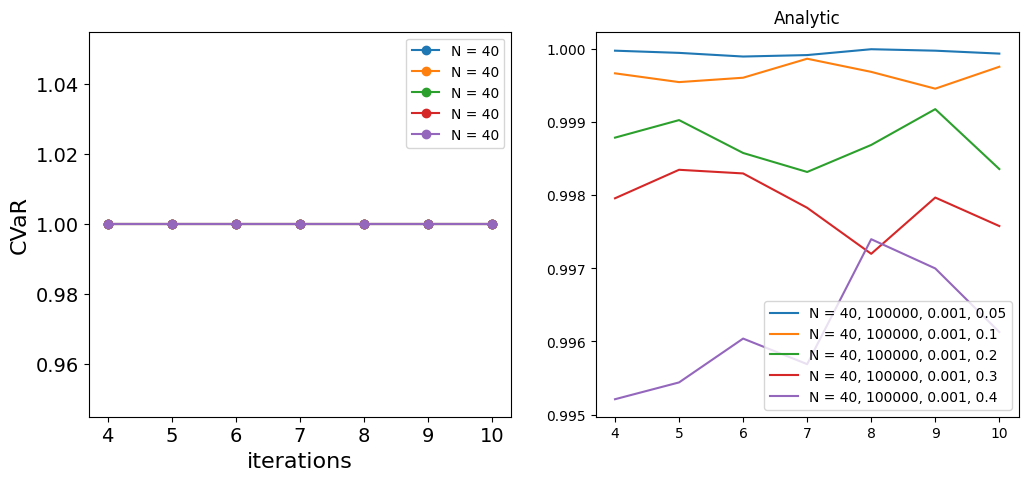

In [13]:
#fill dictionaries with data from files

f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

for if_adsorting in [True]:  #CHANGE LATER!!!!!!!
    
    for graph in graph_type_list:

        # dir_0 = './data_iter_adap_sorting_analytic_mps' + '/graph_{}/shots_{}'\
        #                         .format(graph,  shots)

        for n_qubits_i, num_variables in enumerate(num_variables_list):
            N = int(num_variables)
            
            if graph == 'complete':
                num_params = int(2*(N-1)*N/2 + N)
            elif graph == '3regular':
                num_params= int(2*(3*N)/2 + N)
            elif graph == '100':
                density = 1
                num_params = 2*round((N-1)*N*density/2) +N
            else:
                density = float(f"0.{int(graph)}")
                num_params = 2*round(density*(N-1)*N/2 + 1e-15) +N

            print("qubits = ", N, 'graph', graph)
                
            for alpha in [0.001]:
                
                if alpha == 0.001:
                    shots = 100000
                    c = str(10)
                    color = color_map.get("10", "black")
                    print('here', str(N), color)
                # else:
                #     shots = 10000
                #     c = str(N)
                #     color = color_map.get(c, "black")
                #     print('here', str(N), color)
                
                print(alpha, shots)

                dir_0 = './data_iter_adap_sorting_analytic_mps' + '/graph_{}/shots_{}'\
                        .format(graph,  shots) 
                
                for taui, tau in enumerate([0.05, 0.1,0.2,0.3,0.4]):
                    
                    #print("\ntau = ", tau, "alpha = ", alpha, "qubits = ", N, "parameters =", num_params)
                    
                    dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
                                        .format(num_variables, num_params, layer, alpha)
                    
                    fid_passi = [] 
                    cvar_passi = []

                    tot_steps = range(3, 10)
                    for passo in tot_steps: 
        
                        for r in np.arange(10,11):
                            
                            file_dir_name = dir_name + '/r_{}'\
                                        .format(r)
                            
                            filename = file_dir_name + '/ifadsorting_{}_tau_{}_bond_{}.pkl'\
                                                                    .format(if_adsorting,tau,bond)
                            with open(filename, 'rb') as f:
                                data = pickle.load(f)

                            params_list = data["params_list"]
                            if len(params_list) != round(num_params):
                                print("error N, r = ", r, len(params_list))
                                
                            steps_exp_poss_dict = data["steps_exp_poss_dict"]
                            steps_cvar_dict = data["steps_cvar_dict"]
                            # steps_entropy_dict = data["steps_entropy_dict"]
                            
                            # print(len(steps_exp_poss_dict['step_0'][:]))
                            # print(steps_exp_poss_dict['step_0'][0])
                            # print(steps_exp_poss_dict['step_0'][0][0][0] , 'here')
                            # print([item[0][0] for item in steps_exp_poss_dict['step_0']])
                            # print([item[0][1] for item in steps_exp_poss_dict['step_0']])
                            # print([item[1] for item in steps_exp_poss_dict['step_0']])
                            # print(steps_cvar_dict[f"step_{passo}"])

                            # final_exp_poss = steps_exp_poss_dict[f"step_{passo}"]["l_1"]
                            # poss_list = list(final_exp_poss.values())

                            poss_list = [item[1] for item in steps_exp_poss_dict[f'step_{passo}']]

                            # if poss_list[0] > alpha:
                            #     successes[0][r] = 1
                            # if sum(poss_list[:2]) > alpha:
                            #     successes[1][r] = 1
                            # if sum(poss_list[:3]) > alpha:
                            #     successes[2][r] = 1
                            fidelity = poss_list[0]


                            # print('fidelity', poss_list[0])
                            # exp_opt = list(final_exp_poss.keys())[0]
                            exp_opt = steps_exp_poss_dict[f'step_{passo}'][0][0][0]
                            cvar = steps_cvar_dict[f"step_{passo}"]
                            ar = cvar/exp_opt
                            # print('approx ratio', cvar/exp_opt)
                            # max_key = max(steps_entropy_dict, key=steps_entropy_dict.get)
                            # max_entros.append(steps_entropy_dict[max_key])
                        
                        # print('max fid', max_fid, argmax)
                        # mean_fid = np.mean(successes[0])
                        fid_passi.append(fidelity)
                        
                        cvar_passi.append(ar)

                        # z = 1.96  # Z-score for 95% confidence

                        #         # Compute confidence intervals
                        # margin_of_error = z * (np.std(successes[0], axis=0, ddof=1)/ np.sqrt(len(r_list)))
                        # lower_bound = mean_fid - margin_of_error 
                        # upper_bound = mean_fid + margin_of_error  

                        # lows_fid.append(lower_bound)
                        # ups_fid.append(upper_bound)



                        # for i in range(3):
                        #     fidelity_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][i][0] = np.mean(successes[i])
                        #     fidelity_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][i][1] = np.std(successes[i], axis=0, ddof=1)

                        # cvar_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][0] = np.mean(cvarvalues)
                        # cvar_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][1] = np.std(cvarvalues, axis=0, ddof=1)

                        # mean = np.mean(cvarvalues)
                        # cvar_passi.append(mean)
                        # c = str(N)
                        # # color = color_map.get(c, "black")
                        # # print('here', str(N), color)
                        

                        # z = 1.96  # Z-score for 95% confidence

                        #         # Compute confidence intervals
                        # margin_of_error = z * (np.std(cvarvalues, axis=0, ddof=1)/ np.sqrt(len(r_list)))
                        # lower_bound = mean - margin_of_error 
                        # upper_bound = mean + margin_of_error  

                        # lows.append(lower_bound)
                        # ups.append(upper_bound)

                        # if if_adsorting:
                        #     ax1.plot(passo + 1, np.mean(cvarvalues), "o-", color = color, label = f'{num_variables}, {if_adsorting}, {shots}')
                        # else:
                        #     ax2.plot(passo + 1, np.mean(cvarvalues), "o-", color = color, label = f'{num_variables}, {if_adsorting}, {shots}')
                    
                    print('\n Fidelities', fid_passi, tau)
                    print('\n cvar', cvar_passi, tau)
                    if if_adsorting:
                        xaxis = [pp +1 for pp in tot_steps]
                        # ax1.plot(xaxis, cvar_passi, "o-", color = color, label = f'N = {int(num_variables)}')
                        ax1.plot(xaxis, cvar_passi, "o-", label = f'N = {int(num_variables)}')
                        # ax1.fill_between(xaxis, lows, ups, color= color, alpha=0.1)
                        ax1.set_xticks(range(int(min(xaxis)), int(max(xaxis)) + 1))
                        ax1.set_ylabel('CVaR', fontsize=16)
                        ax1.set_xlabel('iterations', fontsize=16)
                                            # Adjust tick font size
                        ax1.tick_params(axis='x', labelsize=14)  # Set x-axis tick font size
                        ax1.tick_params(axis='y', labelsize=14)  # Set y-axis tick font size
                        ax1.legend()
                    else:
                        xaxis = [pp +1 for pp in tot_steps]
                        ax1.plot(xaxis, cvar_passi, "o-", color = color, label = f'N = {int(num_variables)}')
                        # ax1.fill_between(xaxis, lows, ups, color= color, alpha=0.1)
                        ax1.set_xticks(range(int(min(xaxis)), int(max(xaxis)) + 1))
                        ax1.set_ylabel('CVaR', fontsize=16)
                        ax1.set_xlabel('iterations',fontsize=16)
                        ax1.tick_params(axis='x', labelsize=14)  # Set x-axis tick font size
                        ax1.tick_params(axis='y', labelsize=14)  # Set y-axis tick font size
                        ax1.legend()

                    # ax2.plot(xaxis, fid_passi, color = color, label = f'N = {int(num_variables)}, {shots}, {alpha}')
                    ax2.plot(xaxis, fid_passi, label = f'N = {int(num_variables)}, {shots}, {alpha}, {tau}')
                    # ax2.fill_between(xaxis, lows_fid, ups_fid, color= color, alpha=0.1)
                    ax2.legend()
                    ax2.set_title('Analytic')

                        # ax2.plot(passo +1 , np.mean(cvarvalues), "o:", label = f'{num_variables}, {if_adsorting}, {shots}')

                    # entropy_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][0] = np.mean(max_entros)
                    # entropy_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][1] = np.std(max_entros, axis=0, ddof=1)

qubits =  40 graph 3regular
here 40 green
0.001 100000

 non zeros: 32

 mean fid, sr, tau 0.6399582 0.64 0.05
[0, 0.99997, 0.99993, 0, 0.99999, 0.99993, 0, 0.99995, 0, 0, 0.99997, 0.99988, 0, 0.99993, 0.99987, 0, 0.99986, 0, 0.99998, 0, 0.99995, 0, 0.99993, 0.99996, 0, 0, 0.9999, 0.99996, 0.9999, 0.99993, 0.99999, 0.99993, 0, 0, 0.99991, 0.99986, 0.99996, 0.99996, 0, 0.9999, 0.99994, 0, 0.99996, 0.99994, 0, 0.99994, 0.99995, 0, 0.99996, 0.99992]

 non zeros: 37

 mean fid, sr, tau 0.7396957999999999 0.74 0.1
[0, 0.99961, 0.99953, 0, 0.99971, 0.99935, 0.9996, 0.99949, 0, 0, 0.99973, 0.99969, 0, 0.99935, 0.99966, 0, 0.99966, 0, 0.99947, 0, 0.99935, 0, 0.99968, 0.99974, 0, 0.9997, 0.99957, 0.9994, 0.99972, 0.99961, 0.99949, 0.99951, 0.99961, 0, 0.99959, 0.99946, 0.9997, 0.99952, 0.99955, 0.99974, 0.99971, 0, 0.99951, 0.99967, 0, 0.99946, 0.99956, 0.99964, 0.99986, 0.99959]

 non zeros: 40

 mean fid, sr, tau 0.798922 0.8 0.2
[0, 0.99807, 0.99848, 0.99874, 0.99885, 0.99851, 0.9986, 0.9988

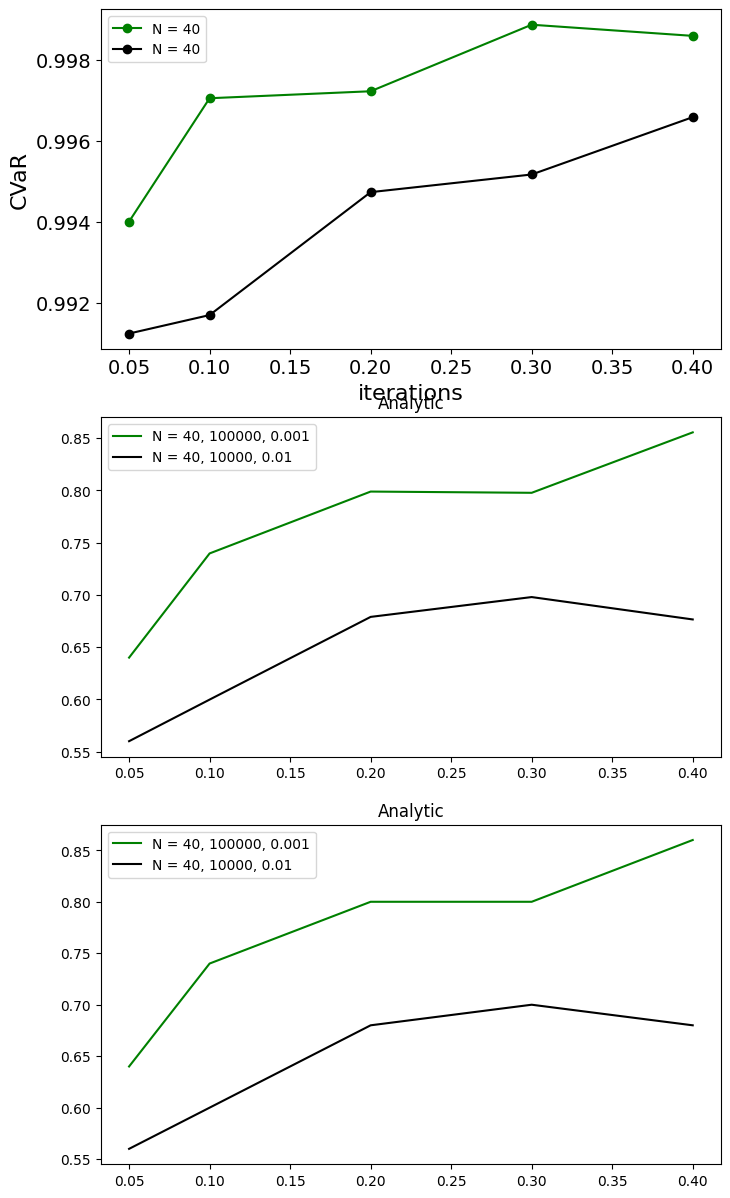

In [45]:
#fill dictionaries with data from files

tot_steps = np.arange(10)

f = plt.figure(figsize=(8, 15))
ax1 = f.add_subplot(311)
ax2 = f.add_subplot(312)
ax3 = f.add_subplot(313)

for if_adsorting in [True]:  #CHANGE LATER!!!!!!!
    
    for graph in graph_type_list:

        # dir_0 = './data_iter_adap_sorting_analytic_mps' + '/graph_{}/shots_{}'\
        #                         .format(graph,  shots)

        for n_qubits_i, num_variables in enumerate(num_variables_list):
            N = int(num_variables)
            
            if graph == 'complete':
                num_params = int(2*(N-1)*N/2 + N)
            elif graph == '3regular':
                num_params= int(2*(3*N)/2 + N)
            elif graph == '100':
                density = 1
                num_params = 2*round((N-1)*N*density/2) +N
            else:
                density = float(f"0.{int(graph)}")
                num_params = 2*round(density*(N-1)*N/2 + 1e-15) +N

            print("qubits = ", N, 'graph', graph)
                
            for alpha in alpha_list:
                
                if alpha == 0.001:
                    shots = 100000
                    c = str(10)
                    color = color_map.get("10", "black")
                    print('here', str(N), color)
                else:
                    shots = 10000
                    c = str(N)
                    color = color_map.get(c, "black")
                    print('here', str(N), color)
                
                print(alpha, shots)

                dir_0 = './data_iter_adap_sorting_analytic_mps' + '/graph_{}/shots_{}'\
                        .format(graph,  shots) 
                for taui, tau in enumerate(tau_list):
                    
                    #print("\ntau = ", tau, "alpha = ", alpha, "qubits = ", N, "parameters =", num_params)
                    
                    dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
                                        .format(num_variables, num_params, layer, alpha)
                    
                    cvar_passi = [] 
                    fidelities_passi = [] 
                    succ_rate_passi = []

                    for passo in [0.05, 0.1, 0.2, 0.3, 0.4]: 
                        
                        cvars = []
                        fidelities = []
                        successes = np.zeros((3, 50))
                        max_fid = 0
                        argmax = 0 
                        
                        for r in np.arange(50):
                            
                            file_dir_name = dir_name + '/r_{}'\
                                        .format(r)
                            
                            filename = file_dir_name + '/ifadsorting_{}_tau_{}_bond_{}.pkl'\
                                                                    .format(if_adsorting,passo,bond)
                            with open(filename, 'rb') as f:
                                data = pickle.load(f)

                            params_list = data["params_list"]
                            if len(params_list) != round(num_params):
                                print("error N, r = ", r, len(params_list))
                                
                            steps_exp_poss_dict = data["steps_exp_poss_dict"]
                            steps_cvar_dict = data["steps_cvar_dict"]
                            # steps_entropy_dict = data["steps_entropy_dict"]
                            
                            # print(len(steps_exp_poss_dict['step_0'][:]))
                            # print(steps_exp_poss_dict['step_0'][0])
                            # print(steps_exp_poss_dict['step_0'][0][0][0] , 'here')
                            # print([item[0][0] for item in steps_exp_poss_dict['step_0']])
                            # print([item[0][1] for item in steps_exp_poss_dict['step_0']])
                            # print([item[1] for item in steps_exp_poss_dict['step_0']])
                            # print(steps_cvar_dict[f"step_{passo}"])

                            # final_exp_poss = steps_exp_poss_dict[f"step_{passo}"]["l_1"]
                            # poss_list = list(final_exp_poss.values())

                            poss_list = [item[1] for item in steps_exp_poss_dict[f'step_{len(tot_steps)-1}']]

                            if poss_list[0] > alpha:
                                successes[0][r] = 1
                            if sum(poss_list[:2]) > alpha:
                                successes[1][r] = 1
                            if sum(poss_list[:3]) > alpha:
                                successes[2][r] = 1

                            # print(r, poss_list[0], 'fidelities')
                            if poss_list[0] > max_fid:
                                max_fid = poss_list[0]
                                argmax = r 

                            fidelities.append(poss_list[0])

                            # exp_opt = list(final_exp_poss.keys())[0]
                            exp_opt = steps_exp_poss_dict[f'step_{len(tot_steps)-1}'][0][0][0]
                            cvar = steps_cvar_dict[f"step_{len(tot_steps)-1}"]
                            cvars.append(cvar/exp_opt)

                            # if r == 49:
                            #     print('\n', r, poss_list[0], cvar)
                        
                        # print('max fid', max_fid, argmax)
                        mean_fid = np.mean(successes[0])
                        succ_rate_passi.append(mean_fid)
                        
                        fidelities_passi.append(np.mean(fidelities))

                        print('\n non zeros:',  np.count_nonzero(successes[0]))
                        print('\n mean fid, sr, tau', np.mean(fidelities), mean_fid, passo)
                        print(fidelities)
                        mean = np.mean(cvars)
                        cvar_passi.append(mean)
                        c = str(N)
                        # color = color_map.get(c, "black")
                        # print('here', str(N), color)
                        

                        # z = 1.96  # Z-score for 95% confidence

                        #         # Compute confidence intervals
                        # margin_of_error = z * (np.std(cvarvalues, axis=0, ddof=1)/ np.sqrt(len(r_list)))
                        # lower_bound = mean - margin_of_error 
                        # upper_bound = mean + margin_of_error  

                        # lows.append(lower_bound)
                        # ups.append(upper_bound)

                        # if if_adsorting:
                        #     ax1.plot(passo + 1, np.mean(cvarvalues), "o-", color = color, label = f'{num_variables}, {if_adsorting}, {shots}')
                        # else:
                        #     ax2.plot(passo + 1, np.mean(cvarvalues), "o-", color = color, label = f'{num_variables}, {if_adsorting}, {shots}')

                    if if_adsorting:
                        xaxis = [pp +1 for pp in tot_steps]
                        xaxis = [0.05, 0.1, 0.2, 0.3, 0.4]
                        ax1.plot(xaxis, cvar_passi, "o-", color = color, label = f'N = {int(num_variables)}')
                        # ax1.fill_between(xaxis, lows, ups, color= color, alpha=0.1)
                        # ax1.set_xticks(range(int(min(xaxis)), int(max(xaxis)) + 1))
                        ax1.set_ylabel('CVaR', fontsize=16)
                        ax1.set_xlabel('iterations', fontsize=16)
                                            # Adjust tick font size
                        ax1.tick_params(axis='x', labelsize=14)  # Set x-axis tick font size
                        ax1.tick_params(axis='y', labelsize=14)  # Set y-axis tick font size
                        ax1.legend()
                    else:
                        xaxis = [pp +1 for pp in tot_steps]
                        xaxis = [0.05, 0.1, 0.2, 0.3, 0.4]
                        ax1.plot(xaxis, cvar_passi, "o-", color = color, label = f'N = {int(num_variables)}')
                        # ax1.fill_between(xaxis, lows, ups, color= color, alpha=0.1)
                        # ax1.set_xticks(range(int(min(xaxis)), int(max(xaxis)) + 1))
                        ax1.set_ylabel('CVaR', fontsize=16)
                        ax1.set_xlabel('iterations',fontsize=16)
                        ax1.tick_params(axis='x', labelsize=14)  # Set x-axis tick font size
                        ax1.tick_params(axis='y', labelsize=14)  # Set y-axis tick font size
                        ax1.legend()

                    ax2.plot(xaxis, fidelities_passi, color = color, label = f'N = {int(num_variables)}, {shots}, {alpha}')
                    # ax2.fill_between(xaxis, lows_fid, ups_fid, color= color, alpha=0.1)
                    ax2.legend()
                    ax2.set_title('Analytic')

                    ax3.plot(xaxis, succ_rate_passi, color = color, label = f'N = {int(num_variables)}, {shots}, {alpha}')
                    # ax2.fill_between(xaxis, lows_fid, ups_fid, color= color, alpha=0.1)
                    ax3.legend()
                    ax3.set_title('Analytic')

                        # ax2.plot(passo +1 , np.mean(cvarvalues), "o:", label = f'{num_variables}, {if_adsorting}, {shots}')

                    # entropy_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][0] = np.mean(max_entros)
                    # entropy_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][1] = np.std(max_entros, axis=0, ddof=1)

qubits =  40 graph 3regular
here 40 green
0.001 100000

 non zeros: 32

 mean fid, sr, tau 0.6399618000000001 0.64 0.05
[0, 0.99994, 0, 0.99996, 0.99992, 0.99995, 0, 0.99998, 0, 0, 0.99992, 0.99991, 0, 1.0, 0.99993, 0, 0.99997, 0, 0.99993, 0, 0.99994, 0, 0.99995, 0.99989, 0, 0, 0.99998, 0.99986, 0.99993, 0.99997, 0.99997, 0.99996, 0, 0, 0.99993, 0.99996, 0.99992, 0.99995, 0.9999, 0.99995, 0.99994, 0, 0, 0.99986, 0, 0.99993, 0.99995, 0, 0.99996, 0.99998]

 non zeros: 36

 mean fid, sr, tau 0.7197574 0.72 0.1
[0, 0.99965, 0.99929, 0.99958, 0.99975, 0.99965, 0.99972, 0.99968, 0, 0, 0.99972, 0.99945, 0, 0.99965, 0.99974, 0, 0.99977, 0, 0.99959, 0, 0.99969, 0, 0.99973, 0.99946, 0.99978, 0, 0.99978, 0.9996, 0.99975, 0.99978, 0.99964, 0.99973, 0, 0, 0.99935, 0.99963, 0.99969, 0.99978, 0, 0.99978, 0.9994, 0, 0.99981, 0.99954, 0, 0.99969, 0.99982, 0.99982, 0.99971, 0.99967]

 non zeros: 38

 mean fid, sr, tau 0.7590832000000001 0.76 0.2
[0, 0.99881, 0.99885, 0.99864, 0.99855, 0.99885, 0.99842, 

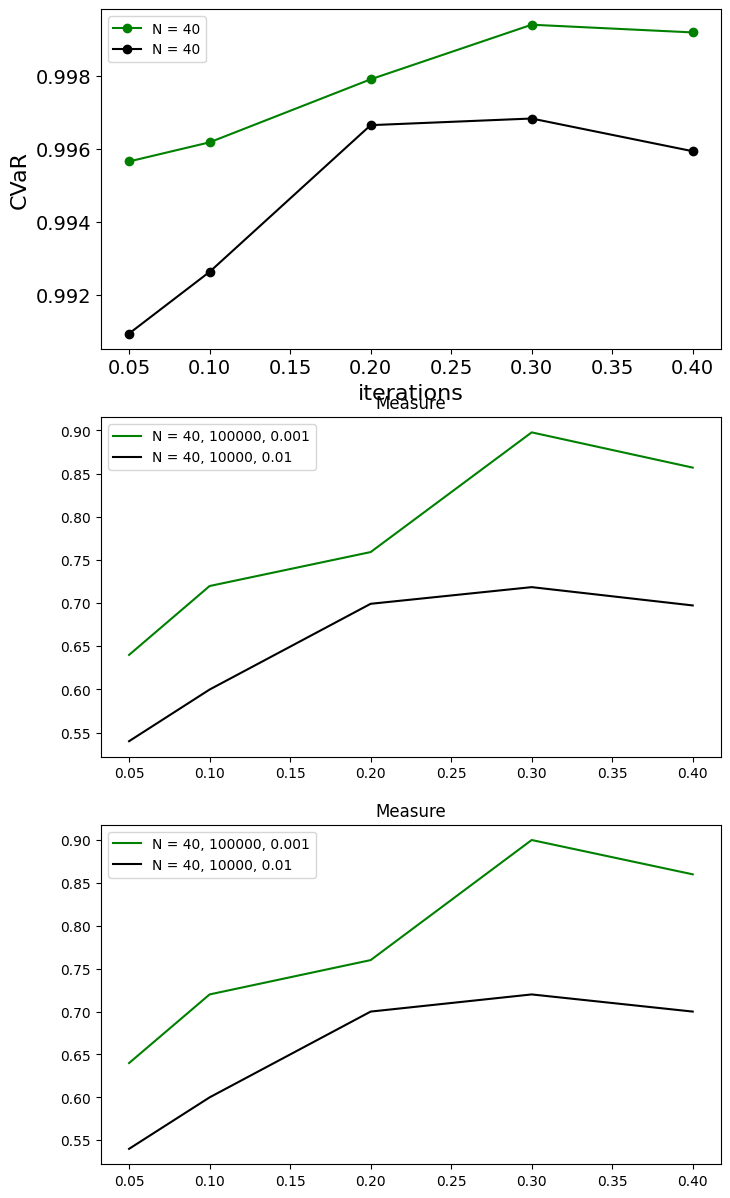

In [46]:
#fill dictionaries with data from files

tot_steps = np.arange(10)

f = plt.figure(figsize=(8, 15))
ax1 = f.add_subplot(311)
ax2 = f.add_subplot(312)
ax3 = f.add_subplot(313)

for if_adsorting in [True]:  #CHANGE LATER!!!!!!!
    
    for graph in graph_type_list:

        # dir_0 = './data_iter_adap_sorting_analytic_mps' + '/graph_{}/shots_{}'\
        #                         .format(graph,  shots)

        for n_qubits_i, num_variables in enumerate(num_variables_list):
            N = int(num_variables)
            
            if graph == 'complete':
                num_params = int(2*(N-1)*N/2 + N)
            elif graph == '3regular':
                num_params= int(2*(3*N)/2 + N)
            elif graph == '100':
                density = 1
                num_params = 2*round((N-1)*N*density/2) +N
            else:
                density = float(f"0.{int(graph)}")
                num_params = 2*round(density*(N-1)*N/2 + 1e-15) +N

            print("qubits = ", N, 'graph', graph)
                
            for alpha in alpha_list:
                
                if alpha == 0.001:
                    shots = 100000
                    c = str(10)
                    color = color_map.get("10", "black")
                    print('here', str(N), color)
                else:
                    shots = 10000
                    c = str(N)
                    color = color_map.get(c, "black")
                    print('here', str(N), color)
                
                print(alpha, shots)

                dir_0 = './data_iter_adap_sorting_nomeasure_mps' + '/graph_{}/shots_{}'\
                        .format(graph,  shots) 
                for taui, tau in enumerate(tau_list):
                    
                    #print("\ntau = ", tau, "alpha = ", alpha, "qubits = ", N, "parameters =", num_params)
                    
                    dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
                                        .format(num_variables, num_params, layer, alpha)
                    
                    cvar_passi = [] 
                    fidelities_passi = [] 
                    succ_rate_passi = []

                    for passo in [0.05, 0.1, 0.2, 0.3, 0.4]: 
                        
                        cvars = []
                        fidelities = []
                        successes = np.zeros((3, 50))
                        max_fid = 0
                        argmax = 0 
                        
                        for r in np.arange(50):
                            
                            file_dir_name = dir_name + '/r_{}'\
                                        .format(r)
                            
                            filename = file_dir_name + '/ifadsorting_{}_tau_{}_bond_{}.pkl'\
                                                                    .format(if_adsorting,passo,bond)
                            with open(filename, 'rb') as f:
                                data = pickle.load(f)

                            params_list = data["params_list"]
                            if len(params_list) != round(num_params):
                                print("error N, r = ", r, len(params_list))
                                
                            steps_exp_poss_dict = data["steps_exp_poss_dict"]
                            steps_cvar_dict = data["steps_cvar_dict"]
                            # steps_entropy_dict = data["steps_entropy_dict"]
                            
                            # print(len(steps_exp_poss_dict['step_0'][:]))
                            # print(steps_exp_poss_dict['step_0'][0])
                            # print(steps_exp_poss_dict['step_0'][0][0][0] , 'here')
                            # print([item[0][0] for item in steps_exp_poss_dict['step_0']])
                            # print([item[0][1] for item in steps_exp_poss_dict['step_0']])
                            # print([item[1] for item in steps_exp_poss_dict['step_0']])
                            # print(steps_cvar_dict[f"step_{passo}"])

                            # final_exp_poss = steps_exp_poss_dict[f"step_{passo}"]["l_1"]
                            # poss_list = list(final_exp_poss.values())

                            poss_list = [item[1] for item in steps_exp_poss_dict[f'step_{len(tot_steps)-1}']]

                            if poss_list[0] > alpha:
                                successes[0][r] = 1
                            if sum(poss_list[:2]) > alpha:
                                successes[1][r] = 1
                            if sum(poss_list[:3]) > alpha:
                                successes[2][r] = 1

                            # print(r, poss_list[0], 'fidelities')
                            if poss_list[0] > max_fid:
                                max_fid = poss_list[0]
                                argmax = r 

                            fidelities.append(poss_list[0])

                            # exp_opt = list(final_exp_poss.keys())[0]
                            exp_opt = steps_exp_poss_dict[f'step_{len(tot_steps)-1}'][0][0][0]
                            cvar = steps_cvar_dict[f"step_{len(tot_steps)-1}"]
                            cvars.append(cvar/exp_opt)

                            # if r == 49:
                            #     print('\n', r, poss_list[0], cvar)
                        
                        # print('max fid', max_fid, argmax)
                        mean_fid = np.mean(successes[0])
                        succ_rate_passi.append(mean_fid)
                        
                        fidelities_passi.append(np.mean(fidelities))

                        print('\n non zeros:',  np.count_nonzero(successes[0]))
                        print('\n mean fid, sr, tau', np.mean(fidelities), mean_fid, passo)
                        print(fidelities)
                        mean = np.mean(cvars)
                        cvar_passi.append(mean)
                        c = str(N)
                        # color = color_map.get(c, "black")
                        # print('here', str(N), color)
                        

                        # z = 1.96  # Z-score for 95% confidence

                        #         # Compute confidence intervals
                        # margin_of_error = z * (np.std(cvarvalues, axis=0, ddof=1)/ np.sqrt(len(r_list)))
                        # lower_bound = mean - margin_of_error 
                        # upper_bound = mean + margin_of_error  

                        # lows.append(lower_bound)
                        # ups.append(upper_bound)

                        # if if_adsorting:
                        #     ax1.plot(passo + 1, np.mean(cvarvalues), "o-", color = color, label = f'{num_variables}, {if_adsorting}, {shots}')
                        # else:
                        #     ax2.plot(passo + 1, np.mean(cvarvalues), "o-", color = color, label = f'{num_variables}, {if_adsorting}, {shots}')

                    if if_adsorting:
                        xaxis = [pp +1 for pp in tot_steps]
                        xaxis = [0.05, 0.1, 0.2, 0.3, 0.4]
                        ax1.plot(xaxis, cvar_passi, "o-", color = color, label = f'N = {int(num_variables)}')
                        # ax1.fill_between(xaxis, lows, ups, color= color, alpha=0.1)
                        # ax1.set_xticks(range(int(min(xaxis)), int(max(xaxis)) + 1))
                        ax1.set_ylabel('CVaR', fontsize=16)
                        ax1.set_xlabel('iterations', fontsize=16)
                                            # Adjust tick font size
                        ax1.tick_params(axis='x', labelsize=14)  # Set x-axis tick font size
                        ax1.tick_params(axis='y', labelsize=14)  # Set y-axis tick font size
                        ax1.legend()
                    else:
                        xaxis = [pp +1 for pp in tot_steps]
                        xaxis = [0.05, 0.1, 0.2, 0.3, 0.4]
                        ax1.plot(xaxis, cvar_passi, "o-", color = color, label = f'N = {int(num_variables)}')
                        # ax1.fill_between(xaxis, lows, ups, color= color, alpha=0.1)
                        # ax1.set_xticks(range(int(min(xaxis)), int(max(xaxis)) + 1))
                        ax1.set_ylabel('CVaR', fontsize=16)
                        ax1.set_xlabel('iterations',fontsize=16)
                        ax1.tick_params(axis='x', labelsize=14)  # Set x-axis tick font size
                        ax1.tick_params(axis='y', labelsize=14)  # Set y-axis tick font size
                        ax1.legend()

                    ax2.plot(xaxis, fidelities_passi, color = color, label = f'N = {int(num_variables)}, {shots}, {alpha}')
                    # ax2.fill_between(xaxis, lows_fid, ups_fid, color= color, alpha=0.1)
                    ax2.legend()
                    ax2.set_title('Measure')

                    ax3.plot(xaxis, succ_rate_passi, color = color, label = f'N = {int(num_variables)}, {shots}, {alpha}')
                    # ax2.fill_between(xaxis, lows_fid, ups_fid, color= color, alpha=0.1)
                    ax3.legend()
                    ax3.set_title('Measure')

                        # ax2.plot(passo +1 , np.mean(cvarvalues), "o:", label = f'{num_variables}, {if_adsorting}, {shots}')

                    # entropy_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][0] = np.mean(max_entros)
                    # entropy_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][1] = np.std(max_entros, axis=0, ddof=1)

In [5]:
#fill dictionaries with data from files

if_adsorting = True 
graph = '3regular'

for n_qubits_i, num_variables in enumerate(num_variables_list):
    N = int(num_variables)
    
    if graph == 'complete':
        num_params = int(2*(N-1)*N/2 + N)
    elif graph == '3regular':
        num_params= int(2*(3*N)/2 + N)
    elif graph == '100':
        density = 1
        num_params = 2*round((N-1)*N*density/2) +N
    else:
        density = float(f"0.{int(graph)}")
        num_params = 2*round(density*(N-1)*N/2 + 1e-15) +N

    print("qubits = ", N, 'graph', graph)
        
    for alpha in alpha_list:
        
        if alpha == 0.001:
            shots = 100000
            c = str(10)
            color = color_map.get("10", "black")
            print('here', str(N), color)
        else:
            shots = 10000
            c = str(N)
            color = color_map.get(c, "black")
            print('here', str(N), color)
        
        print('\n',alpha, shots)

        dir_0 = './data_iter_adap_sorting_analytic_mps' + '/graph_{}/shots_{}'\
                .format(graph,  shots) 

        for taui, tau in enumerate(tau_list):
            
            #print("\ntau = ", tau, "alpha = ", alpha, "qubits = ", N, "parameters =", num_params)
            
            dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
                                .format(num_variables, num_params, layer, alpha)
            
            cvar_passi = [] 
            fidelities_passi = [] 
            succ_rate_passi = []

            for passo in [0.05, 0.1, 0.2, 0.3, 0.4]: 
                
                cvars = []
                fidelities = []
                successes = np.zeros((3, 50))
                max_fid = 0
                argmax = 0 
                
                for r in r_list:

                            
                    #         #region load qubo instances, get Hamiltonian and edge_coeff_dict
                    # instance_dir = '../instances/'+ graph + '/N_' + str(N)
                    # with open(instance_dir + '/QUBO_' + str(N ) + 'V_'+ 'r_'+ str(r)+ '.gpickle', 'rb') as f:
                    #     G = pickle.load(f)
                    # coeff_list = np.loadtxt(instance_dir + '/QUBO_coeff_' + str(N) + 'V_'+ 'r_'+ str(r)+ '.txt')
                    # h_list = coeff_list[:N ]
                    # J_list = coeff_list[N :]
                    # print('\nr:', r, 'h list', h_list)
                    # print('r:', r, 'J list', J_list)
                    
                    file_dir_name = dir_name + '/r_{}'\
                                .format(r)
                    
                    filename = file_dir_name + '/ifadsorting_{}_tau_{}_bond_{}.pkl'\
                                                            .format(if_adsorting,passo,bond)
                    with open(filename, 'rb') as f:
                        data = pickle.load(f)

                    params_list = data["params_list"]
                    if len(params_list) != round(num_params):
                        print("error N, r = ", r, len(params_list))
                        
                    steps_exp_poss_dict = data["steps_exp_poss_dict"]
                    steps_cvar_dict = data["steps_cvar_dict"]


                    poss_list = [item[1] for item in steps_exp_poss_dict[f'step_{len(tot_steps)-1}']]

                    if poss_list[0] > alpha:
                        successes[0][r] = 1
                    if sum(poss_list[:2]) > alpha:
                        successes[1][r] = 1
                    if sum(poss_list[:3]) > alpha:
                        successes[2][r] = 1

                    # print(r, poss_list[0], 'fidelities')
                    if poss_list[0] > max_fid:
                        max_fid = poss_list[0]
                        argmax = r 

                    fidelities.append(poss_list[0])

                    # exp_opt = list(final_exp_poss.keys())[0]
                    exp_opt = steps_exp_poss_dict[f'step_{len(tot_steps)-1}'][0][0][0]
                    cvar = steps_cvar_dict[f"step_{len(tot_steps)-1}"]
                    cvars.append(cvar/exp_opt)

                    # print('r', r , poss_list[0], cvar/exp_opt)

                    if r == 43:
                        print('\n', r, poss_list[0], cvar/exp_opt)
                
                print('max fid', max_fid, argmax)
                mean_fid = np.mean(successes[0])
                succ_rate_passi.append(mean_fid)
                
                fidelities_passi.append(np.mean(fidelities))

                print('\n non zeros:',  np.count_nonzero(successes[0]))
                print('\n mean fid, sr, tau', np.mean(fidelities), mean_fid, passo)
                print(fidelities)
                mean = np.mean(cvars)
                cvar_passi.append(mean)
                c = str(N)




qubits =  40 graph 3regular
here 40 green

 0.001 100000

 43 0.99996 1.0
max fid 0.99998 2

 non zeros: 32

 mean fid, sr, tau 0.6008374 0.64 0.05
[0, 0.9999, 0.99998, 0, 0.99996, 0.99991, 0, 0.99994, 0, 0, 0.99994, 0.99992, 0, 0.99997, 0.99994, 0, 0.99992, 0, 0.99996, 0, 0.99986, 0, 0.0331, 0.99995, 0, 0, 0.99995, 0.99992, 0.99995, 0.99996, 0.01048, 0.99997, 0, 0, 0.99997, 0.99996, 0.99996, 0.99998, 0, 0.99995, 0.99992, 0, 0.99991, 0.99996, 0, 0.99995, 0.99993, 0, 0.99996, 0.99994]

 43 0.99977 1.0
max fid 0.99985 18

 non zeros: 36

 mean fid, sr, tau 0.7197394 0.72 0.1
[0, 0.99949, 0.99974, 0, 0.99979, 0.99981, 0.9996, 0.99965, 0, 0, 0.99953, 0.99974, 0, 0.99944, 0.99976, 0, 0.99961, 0, 0.99985, 0, 0.9996, 0, 0.99954, 0.99977, 0, 0.99949, 0.99964, 0.99967, 0.99927, 0.99966, 0.99962, 0.99933, 0.99961, 0, 0.99974, 0.99969, 0.99969, 0.99968, 0, 0.99966, 0.99968, 0, 0.99978, 0.99977, 0, 0.99969, 0.9997, 0.99962, 0.99954, 0.99952]

 43 0.99887 1.0
max fid 0.99933 6

 non zeros: 40

 mea

60 qubits!!

qubits =  100 graph 3regular
here 100 green
0.001 100000

 Passi: best r: 3 max fid 1.0 passo 0

 non zeros: 15
[0.99999, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0.99998, 0.99999, 0, 0.99999, 0, 0, 0, 0.99998, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0.99997, 0, 0.99999, 1.0, 0, 0, 1.0, 0, 1.0, 0, 0, 0]

 Passi: best r: 3 max fid 1.0 passo 1

 non zeros: 15
[0.99999, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0.99998, 0.99999, 0, 0.99999, 0, 0, 0, 0.99998, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0.99997, 0, 0.99999, 1.0, 0, 0, 1.0, 0, 1.0, 0, 0, 0]

 Passi: best r: 3 max fid 1.0 passo 2

 non zeros: 15
[0.99999, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0.99998, 0.99999, 0, 0.99999, 0, 0, 0, 0.99998, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0.99997, 0, 0.99999, 1.0, 0, 0, 1.0, 0, 1.0, 0, 0, 0]

 Passi: best r: 3 max fid 1.0 passo 3

 non zeros: 15
[0.99999, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0.99998, 0.99999, 0, 0.99999, 

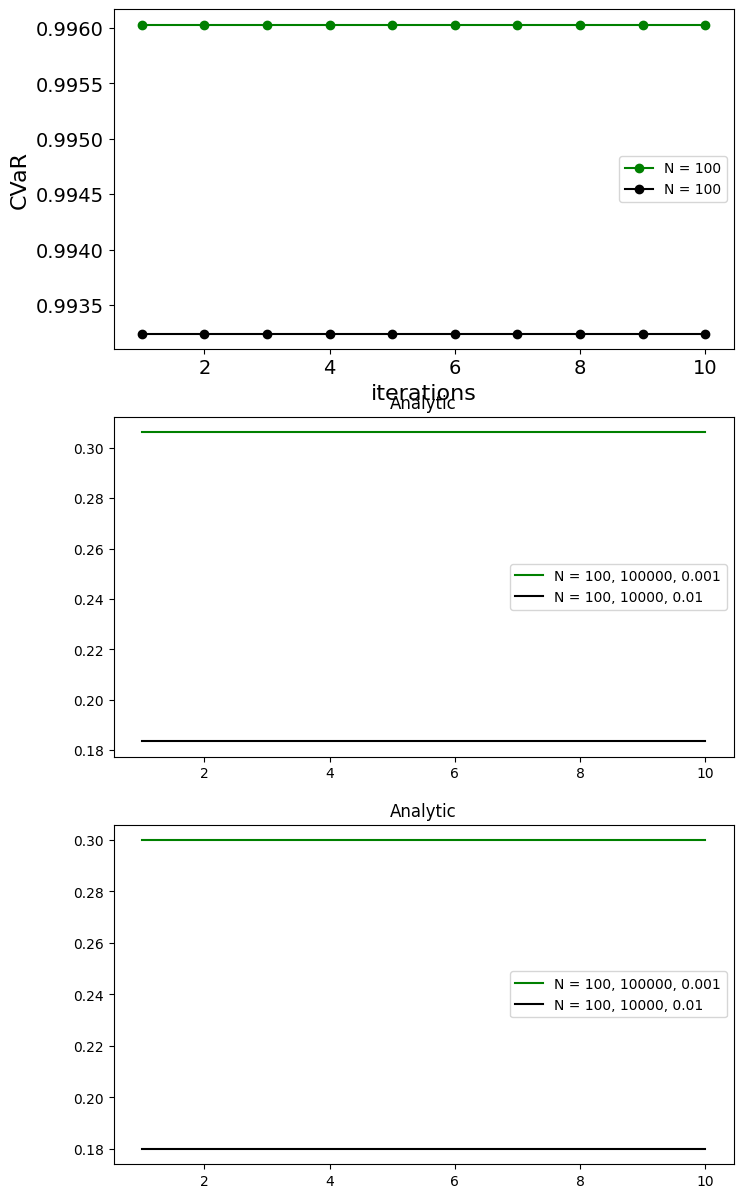

In [22]:
num_variables_list = [str(num).zfill(3) for num in range(100,102, 2)] 
# graph_type_list = [ '3regular', '050', '070', '080', '090', '095', '100','complete']
graph_type_list = ['3regular']

tau = 0.3
r_list = range(50)
tau_list =[0.3] # [0.3, 0.4]
alpha_list = [0.001, 0.01]
layer = 1
shots = 100000
tot_steps = range(10)
bond = 100



#fill dictionaries with data from files

tot_steps = np.arange(10)

f = plt.figure(figsize=(8, 15))
ax1 = f.add_subplot(311)
ax2 = f.add_subplot(312)
ax3 = f.add_subplot(313)

for if_adsorting in [True]:  #CHANGE LATER!!!!!!!
    
    for graph in graph_type_list:

        # dir_0 = './data_iter_adap_sorting_analytic_mps' + '/graph_{}/shots_{}'\
        #                         .format(graph,  shots)

        for n_qubits_i, num_variables in enumerate(num_variables_list):
            N = int(num_variables)
            
            if graph == 'complete':
                num_params = int(2*(N-1)*N/2 + N)
            elif graph == '3regular':
                num_params= int(2*(3*N)/2 + N)
            elif graph == '100':
                density = 1
                num_params = 2*round((N-1)*N*density/2) +N
            else:
                density = float(f"0.{int(graph)}")
                num_params = 2*round(density*(N-1)*N/2 + 1e-15) +N

            print("qubits = ", N, 'graph', graph)
                
            for alpha in alpha_list:
                
                if alpha == 0.001:
                    shots = 100000
                    c = str(10)
                    color = color_map.get("10", "black")
                    print('here', str(N), color)
                else:
                    shots = 10000
                    c = str(N)
                    color = color_map.get(c, "black")
                    print('here', str(N), color)
                
                print(alpha, shots)

                dir_0 = './data_iter_adap_sorting_analytic_mps' + '/graph_{}/shots_{}'\
                        .format(graph,  shots) 
                for taui, tau in enumerate(tau_list):
                    
                    #print("\ntau = ", tau, "alpha = ", alpha, "qubits = ", N, "parameters =", num_params)
                    
                    dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
                                        .format(num_variables, num_params, layer, alpha)
                    
                    cvar_passi = [] 
                    fidelities_passi = [] 
                    succ_rate_passi = []

                    for passo in tot_steps: 
                        
                        cvars = []
                        fidelities = []
                        successes = np.zeros((3, 50))
                        max_fid = 0
                        argmax = 0 
                        
                        for r in np.arange(50):
                            
                            if r==9:
                                continue
                            file_dir_name = dir_name + '/r_{}'\
                                        .format(r)
                            
                            filename = file_dir_name + '/ifadsorting_{}_tau_{}_bond_{}.pkl'\
                                                                    .format(if_adsorting,tau,bond)
                            with open(filename, 'rb') as f:
                                data = pickle.load(f)

                            params_list = data["params_list"]
                            if len(params_list) != round(num_params):
                                print("error N, r = ", r, len(params_list))
                                
                            steps_exp_poss_dict = data["steps_exp_poss_dict"]
                            steps_cvar_dict = data["steps_cvar_dict"]
                            # steps_entropy_dict = data["steps_entropy_dict"]
                            
                            # print(len(steps_exp_poss_dict['step_0'][:]))
                            # print(steps_exp_poss_dict['step_0'][0])
                            # print(steps_exp_poss_dict['step_0'][0][0][0] , 'here')
                            # print([item[0][0] for item in steps_exp_poss_dict['step_0']])
                            # print([item[0][1] for item in steps_exp_poss_dict['step_0']])
                            # print([item[1] for item in steps_exp_poss_dict['step_0']])
                            # print(steps_cvar_dict[f"step_{passo}"])

                            # final_exp_poss = steps_exp_poss_dict[f"step_{passo}"]["l_1"]
                            # poss_list = list(final_exp_poss.values())

                            poss_list = [item[1] for item in steps_exp_poss_dict[f'step_{len(tot_steps)-1}']]

                            if poss_list[0] > alpha:
                                successes[0][r] = 1
                            if sum(poss_list[:2]) > alpha:
                                successes[1][r] = 1
                            if sum(poss_list[:3]) > alpha:
                                successes[2][r] = 1

                            # print(r, poss_list[0], 'fidelities')
                            if poss_list[0] > max_fid:
                                max_fid = poss_list[0]
                                argmax = r 
                            
                        

                            fidelities.append(poss_list[0])

                            # exp_opt = list(final_exp_poss.keys())[0]
                            exp_opt = steps_exp_poss_dict[f'step_{len(tot_steps)-1}'][0][0][0]
                            cvar = steps_cvar_dict[f"step_{len(tot_steps)-1}"]
                            cvars.append(cvar/exp_opt)

                            # if r == 49:
                            #     print('\n', r, poss_list[0], cvar)
                        
                        print('\n Passi:','best r:', argmax, 'max fid', max_fid, 'passo', passo)
                        
                        # print('max fid', max_fid, argmax)
                        mean_fid = np.mean(successes[0])
                        succ_rate_passi.append(mean_fid)
                        
                        fidelities_passi.append(np.mean(fidelities))

                        print('\n non zeros:',  np.count_nonzero(successes[0]))
                        # print('\n mean fid, sr, passo', np.mean(fidelities), mean_fid, passo)
                        print(fidelities)
                        mean = np.mean(cvars)
                        cvar_passi.append(mean)
                        c = str(N)
                        # color = color_map.get(c, "black")
                        # print('here', str(N), color)
                        

                        # z = 1.96  # Z-score for 95% confidence

                        #         # Compute confidence intervals
                        # margin_of_error = z * (np.std(cvarvalues, axis=0, ddof=1)/ np.sqrt(len(r_list)))
                        # lower_bound = mean - margin_of_error 
                        # upper_bound = mean + margin_of_error  

                        # lows.append(lower_bound)
                        # ups.append(upper_bound)

                        # if if_adsorting:
                        #     ax1.plot(passo + 1, np.mean(cvarvalues), "o-", color = color, label = f'{num_variables}, {if_adsorting}, {shots}')
                        # else:
                        #     ax2.plot(passo + 1, np.mean(cvarvalues), "o-", color = color, label = f'{num_variables}, {if_adsorting}, {shots}')

                    if if_adsorting:
                        xaxis = [pp +1 for pp in tot_steps]
                        ax1.plot(xaxis, cvar_passi, "o-", color = color, label = f'N = {int(num_variables)}')
                        # ax1.fill_between(xaxis, lows, ups, color= color, alpha=0.1)
                        # ax1.set_xticks(range(int(min(xaxis)), int(max(xaxis)) + 1))
                        ax1.set_ylabel('CVaR', fontsize=16)
                        ax1.set_xlabel('iterations', fontsize=16)
                                            # Adjust tick font size
                        ax1.tick_params(axis='x', labelsize=14)  # Set x-axis tick font size
                        ax1.tick_params(axis='y', labelsize=14)  # Set y-axis tick font size
                        ax1.legend()
                    else:
                        xaxis = [pp +1 for pp in tot_steps]
                        ax1.plot(xaxis, cvar_passi, "o-", color = color, label = f'N = {int(num_variables)}')
                        # ax1.fill_between(xaxis, lows, ups, color= color, alpha=0.1)
                        # ax1.set_xticks(range(int(min(xaxis)), int(max(xaxis)) + 1))
                        ax1.set_ylabel('CVaR', fontsize=16)
                        ax1.set_xlabel('iterations',fontsize=16)
                        ax1.tick_params(axis='x', labelsize=14)  # Set x-axis tick font size
                        ax1.tick_params(axis='y', labelsize=14)  # Set y-axis tick font size
                        ax1.legend()

                    ax2.plot(xaxis, fidelities_passi, color = color, label = f'N = {int(num_variables)}, {shots}, {alpha}')
                    # ax2.fill_between(xaxis, lows_fid, ups_fid, color= color, alpha=0.1)
                    ax2.legend()
                    ax2.set_title('Analytic')

                    ax3.plot(xaxis, succ_rate_passi, color = color, label = f'N = {int(num_variables)}, {shots}, {alpha}')
                    # ax2.fill_between(xaxis, lows_fid, ups_fid, color= color, alpha=0.1)
                    ax3.legend()
                    ax3.set_title('Analytic')

                        # ax2.plot(passo +1 , np.mean(cvarvalues), "o:", label = f'{num_variables}, {if_adsorting}, {shots}')

                    # entropy_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][0] = np.mean(max_entros)
                    # entropy_results_dict[f'{if_adsorting}'][f'{num_variables}'][f'{graph}'][1] = np.std(max_entros, axis=0, ddof=1)

                    print('\nBest r:', argmax, 'max fid', max_fid)